# Clustering - k-means and DBSCAN for IRIS, Seeds, Glass and PCB Datasets


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, rand_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import DBSCAN
from scipy import stats

In [2]:
from typing import NamedTuple, Any


class UciMlData(NamedTuple):
    ids: pd.DataFrame
    features: pd.DataFrame
    targets: pd.DataFrame
    original: pd.DataFrame
    headers: list[str]


class UciMlDataset(NamedTuple):
    data: UciMlData
    metadata: dict[str, Any]
    variables: pd.DataFrame

In [3]:
def purity_score(y_true, y_pred):
    contingency_mat = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_mat, axis=0)) / np.sum(contingency_mat)


def quality_metrics(X: pd.DataFrame, y_pred: pd.DataFrame):
    return pd.DataFrame(
        {
            "Silhouette": silhouette_score(X, y_pred),
            "Davies Bouldin": davies_bouldin_score(X, y_pred),
        },
        index=[0],
    )


def grouping_metrics(y_true: pd.DataFrame, y_pred: pd.DataFrame):
    return pd.DataFrame(
        {
            "Rand": rand_score(y_true.squeeze(), y_pred),
            "Purity": purity_score(y_true.squeeze(), y_pred),
        },
        index=[0],
    )

In [4]:
def visualize_dbscan(
    X: pd.DataFrame,
    y: pd.Series,
    eps: float = 0.5,
    min_samples: int = 5,
    metric: str = "euclidean",
):
    scaler = StandardScaler()

    X_scaled = scaler.fit_transform(X)

    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    y_dbscan = dbscan.fit_predict(X_scaled)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    print(y_dbscan)

    # Ensure y is an array of integers
    y = y.squeeze()

    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Plot the real classes
    sns.scatterplot(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        hue=y,
        palette="viridis",
        ax=axes[0],
        s=50,
    )
    axes[0].set_title("Real Classes")
    axes[0].set_xlabel("PCA1")
    axes[0].set_ylabel("PCA2")

    # Plot the DBSCAN clusters
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1], hue=y_dbscan, palette="viridis", ax=axes[1], s=50
    )
    axes[1].set_title("DBSCAN Clusters")
    axes[1].set_xlabel("PCA1")
    axes[1].set_ylabel("PCA2")

    plt.show()

    display(quality_metrics(X_pca, y_dbscan))
    display(grouping_metrics(y, y_dbscan))

## 0. Load data


### IRIS


In [5]:
iris_dataset: UciMlDataset = fetch_ucirepo("iris")
X_iris = iris_dataset.data.features
y_iris = iris_dataset.data.targets

print("features: ", iris_dataset.feature_names)
print("shape", X_iris.shape)
print("target names: ", iris_dataset.target_names)

display(X_iris.head())
display(y_iris.head())

print(f"number of classes: {y_iris.nunique()}")

features:  None
shape (150, 4)
target names:  None


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


### SEEDS


In [6]:
seeds_dataset = pd.read_csv(
    "data/seeds_dataset.txt",
    sep=",",
    header=None,
    names=[
        "area",
        "perimeter",
        "compactness",
        "length",
        "width",
        "asymmetry",
        "groove",
        "class",
    ],
)

X_seeds = seeds_dataset.drop(columns=["class"])
y_seeds = pd.DataFrame(seeds_dataset["class"])

print(seeds_dataset.shape)
display(X_seeds.head())
display(y_seeds.head())

print(f"number of classes: {y_iris.nunique()}")

(210, 8)


,area,perimeter,compactness,length,width,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


,class
0,1
1,1
2,1
3,1
4,1


### Glass


In [7]:
glass_dataset: UciMlDataset = fetch_ucirepo("glass")

X_glass = glass_dataset.data.features
y_glass = glass_dataset.data.targets

y_glass = y_glass.rename(columns={"Type_of_glass": "class"})

print(X_glass.shape)
display(X_glass.head())
display(y_glass.head())

print(f"number of classes: {y_iris.nunique()}")

(214, 9)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


,class
0,1
1,1
2,1
3,1
4,1


### PCB


In [8]:
pcb_dataset: UciMlDataset = fetch_ucirepo(id=365)

X_pcb = pcb_dataset.data.features
y_pcb = pcb_dataset.data.targets

print(X_pcb.shape)
display(X_pcb.head())
display(y_pcb.head())

(43405, 65)


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


,class
0,0
1,0
2,0
3,0
4,0


## 1. k-means on IRIS


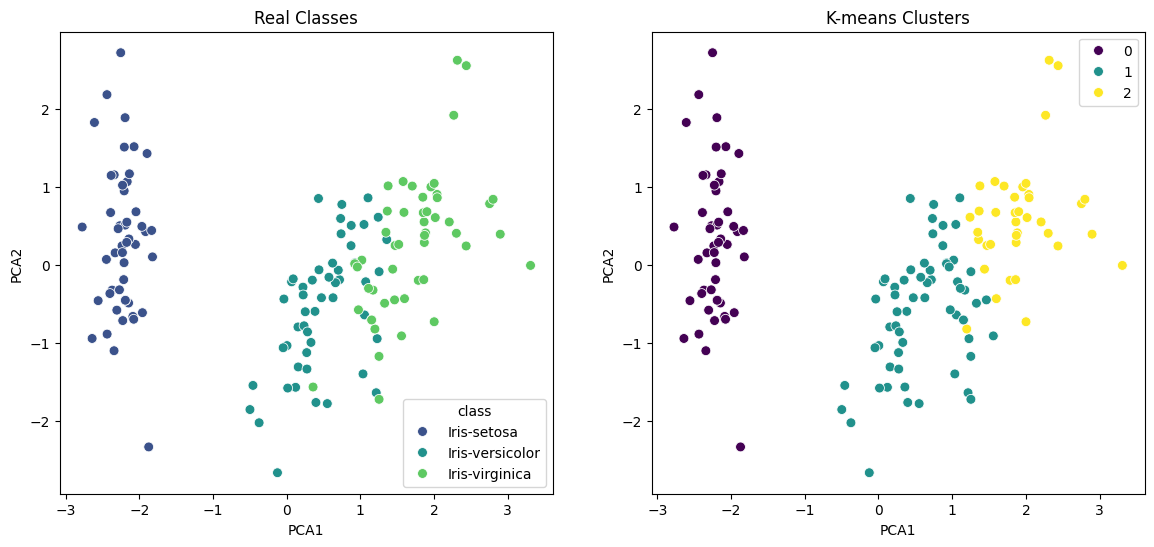

,Silhouette,Davies Bouldin
0,0.487479,0.73792


,Rand,Purity
0,0.879732,0.893333


In [9]:
from matplotlib.pyplot import plot
import seaborn as sns


def visualize_kmeans(
    X: pd.DataFrame,
    y: pd.Series,
    n_clusters: int,
    n_init: int = 10,
    max_iter: int = 300,
):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Ensure y is an array of integers
    # y = pd.factorize(y)[0]

    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Plot the real classes
    sns.scatterplot(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        hue=y["class"],
        palette="viridis",
        ax=axes[0],
        s=50,
    )
    axes[0].set_title("Real Classes")
    axes[0].set_xlabel("PCA1")
    axes[0].set_ylabel("PCA2")

    # Plot the k-means clusters
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette="viridis", ax=axes[1], s=50
    )
    # centers = kmeans.cluster_centers_
    # axes[1].scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)
    axes[1].set_title("K-means Clusters")
    axes[1].set_xlabel("PCA1")
    axes[1].set_ylabel("PCA2")

    plt.show()

    display(quality_metrics(X_pca, y_kmeans))
    display(grouping_metrics(y, y_kmeans))


visualize_kmeans(X_iris, y_iris, 3)

## 2. k-means parameter tests on SEEDS and GLASS


- n_clusters – liczba klastrów (sprawdź najpierw na IRIS)
- n_init – liczba restartów
- max_iter – maksymalna liczba iteracji


In [10]:
n_clusters_range = range(2, 7)
n_init_range = range(3, 16, 4)
max_iter_range = range(20, 200, 50)


def test_k_means_params(
    X: pd.DataFrame, y: pd.DataFrame, n_clusters: int, n_init: int, max_iter: int
):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter)

    # standardize
    scale = StandardScaler()
    X_scaled = scale.fit_transform(X)

    y_kmeans = kmeans.fit_predict(X_scaled)

    quality_metrics_df = quality_metrics(X_scaled, y_kmeans)
    grouping_metrics_df = grouping_metrics(y, y_kmeans)

    return pd.concat([quality_metrics_df, grouping_metrics_df], axis=1).assign(
        n_clusters=n_clusters, n_init=n_init, max_iter=max_iter
    )


def test_all_params(
    X: pd.DataFrame, y: pd.DataFrame, n_clusters_range, n_init_range, max_iter_range
):
    results = []
    for n_clusters in n_clusters_range:
        for n_init in n_init_range:
            for max_iter in max_iter_range:
                res = test_k_means_params(X, y, n_clusters, n_init, max_iter)
                results.append(res)

    return pd.concat(results, ignore_index=True)

### SEEDS


In [11]:
results_seeds_kmeans = test_all_params(
    X_seeds, y_seeds, n_clusters_range, n_init_range, max_iter_range
)

In [12]:
display(results_seeds_kmeans)

,Silhouette,Davies Bouldin,Rand,Purity,n_clusters,n_init,max_iter
0,0.465772,0.796879,0.734381,0.657143,2,3,20
1,0.465772,0.796879,0.734381,0.657143,2,3,70
2,0.465772,0.796879,0.734381,0.657143,2,3,120
3,0.465772,0.796879,0.734381,0.657143,2,3,170
4,0.465772,0.796879,0.734381,0.657143,2,7,20
...,...,...,...,...,...,...,...
75,0.278070,1.157126,0.799635,0.880952,6,11,170
76,0.278181,1.164084,0.797084,0.880952,6,15,20
77,0.290344,1.118886,0.791524,0.871429,6,15,70
78,0.286574,1.128937,0.802825,0.876190,6,15,120


### metryki

Silhouette
- dla pojedynczej próbko: iloczyn średniej odległości między punktem a innymi punktami w klastrze oraz minimalna średnia odległość między punktem a punktami z innych klastrów
- dla całości: średnia silhouette dla wszystkich próbek
- im bliżej 1 tym lepsza klasteryzacja

Davies-Bouldin
-  niższe wartości oznaczają lepsze podziały

Rand Index

$$
RI = \frac{TP + TN}{TP + FP + FN + TN}
$$

Purity

- W jakim stopniu klastry zawierają próbki z jednej klasy

In [13]:
def plot_results(results: pd.DataFrame, metric: str, title: str):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Plot Silhouette score
    sns.lineplot(
        data=results,
        x=metric,
        y="Silhouette",
        errorbar=None,
        ax=axes[0, 0],
        marker="o",
        linestyle="--",
    )
    axes[0, 0].set_title(f"Silhouette score for {title}")

    # Plot Davies Bouldin score
    sns.lineplot(
        data=results,
        x=metric,
        y="Davies Bouldin",
        errorbar=None,
        ax=axes[0, 1],
        marker="o",
        linestyle="--",
    )
    axes[0, 1].set_title(f"Davies Bouldin score for {title}")

    # Plot Rand score
    sns.lineplot(
        data=results,
        x=metric,
        y="Rand",
        errorbar=None,
        ax=axes[1, 0],
        marker="o",
        linestyle="--",
    )
    axes[1, 0].set_title(f"Rand score for {title}")

    # Plot Purity score
    sns.lineplot(
        data=results,
        x=metric,
        y="Purity",
        errorbar=None,
        ax=axes[1, 1],
        marker="o",
        linestyle="--",
    )
    axes[1, 1].set_title(f"Purity score for {title}")

    plt.tight_layout()
    plt.show()

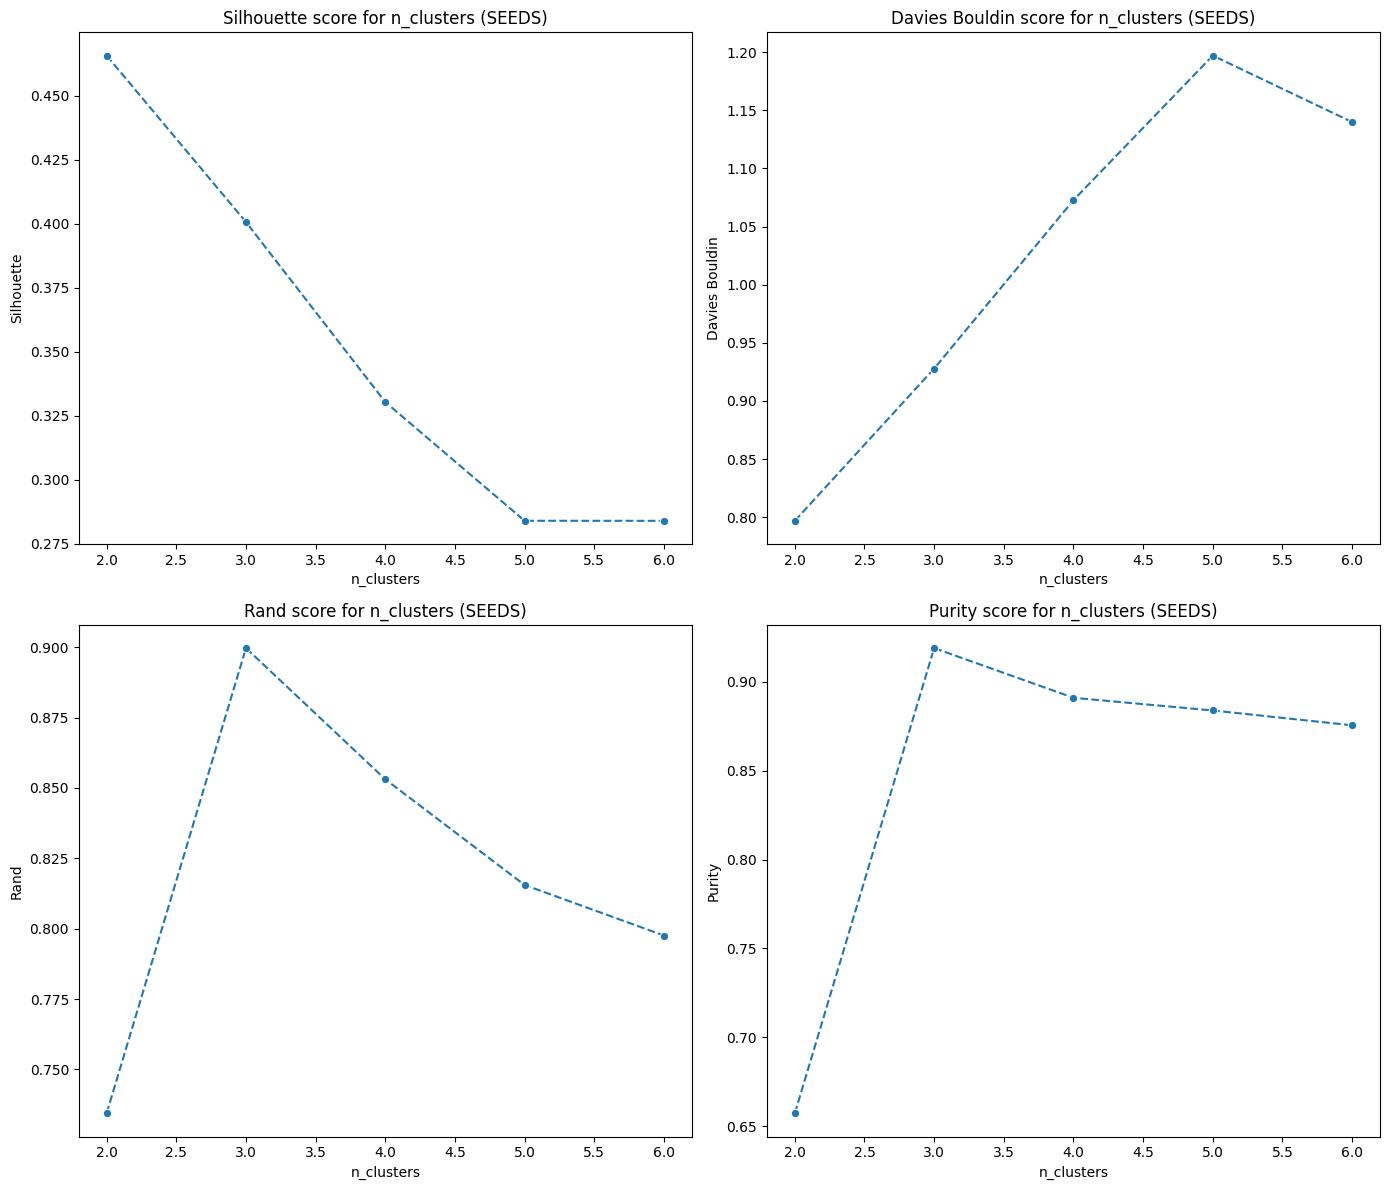

In [14]:
plot_results(results_seeds_kmeans, "n_clusters", "n_clusters (SEEDS)")

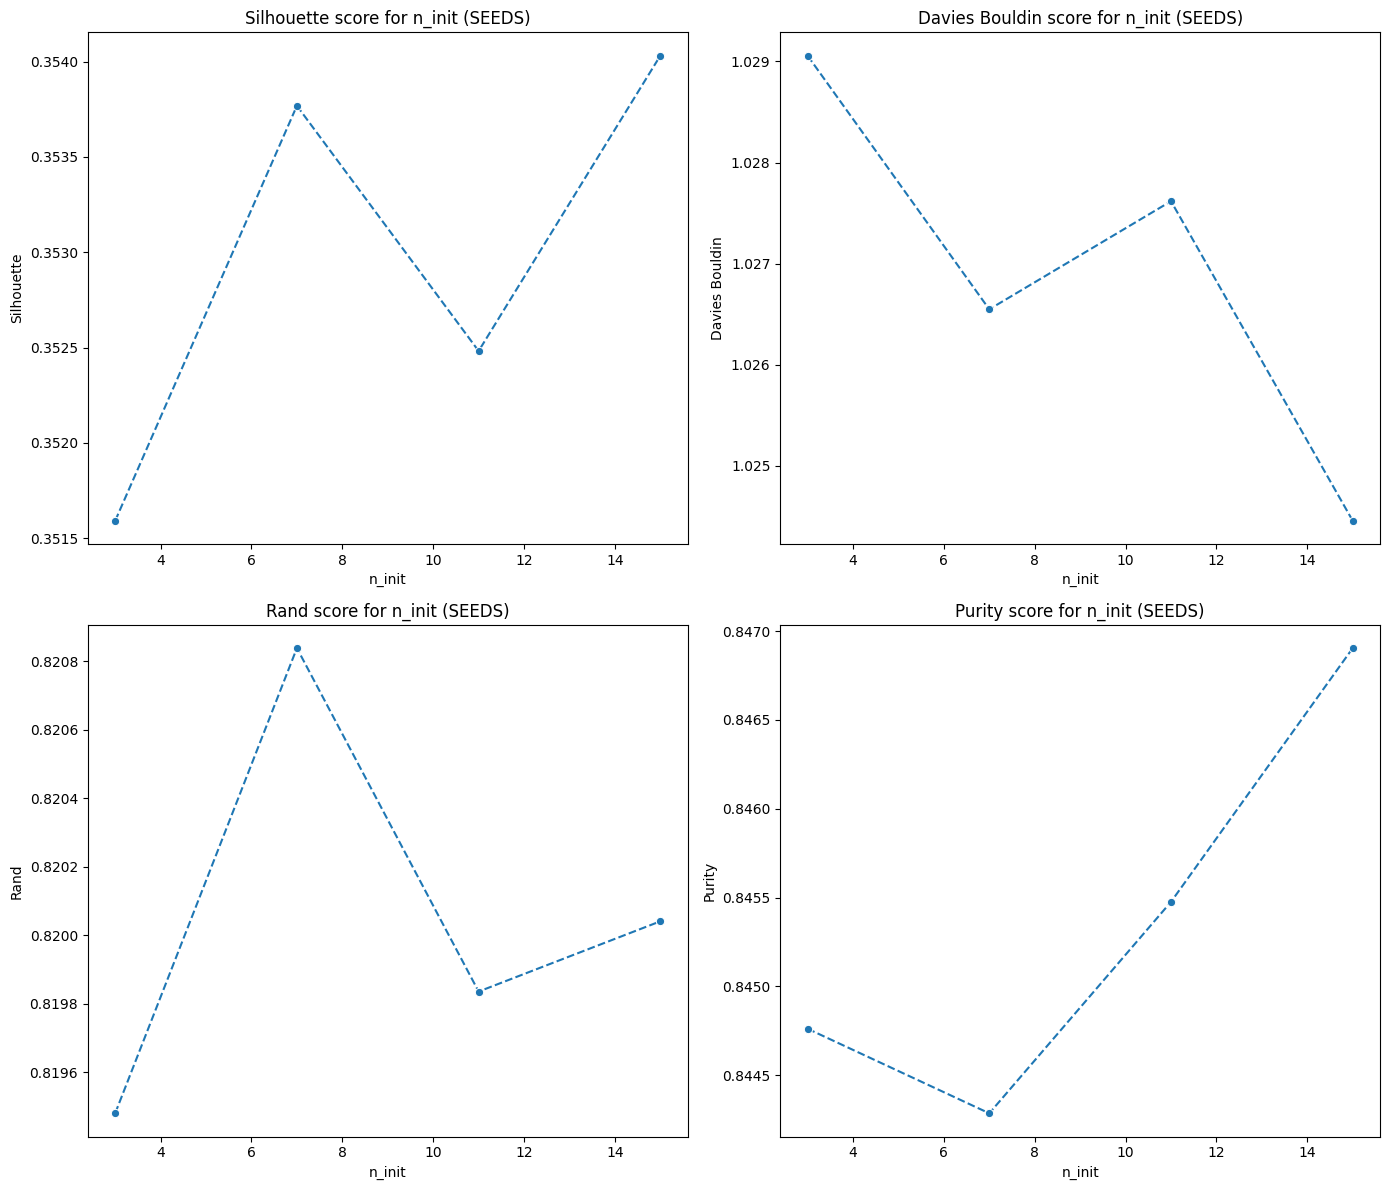

In [15]:
plot_results(results_seeds_kmeans, "n_init", "n_init (SEEDS)")

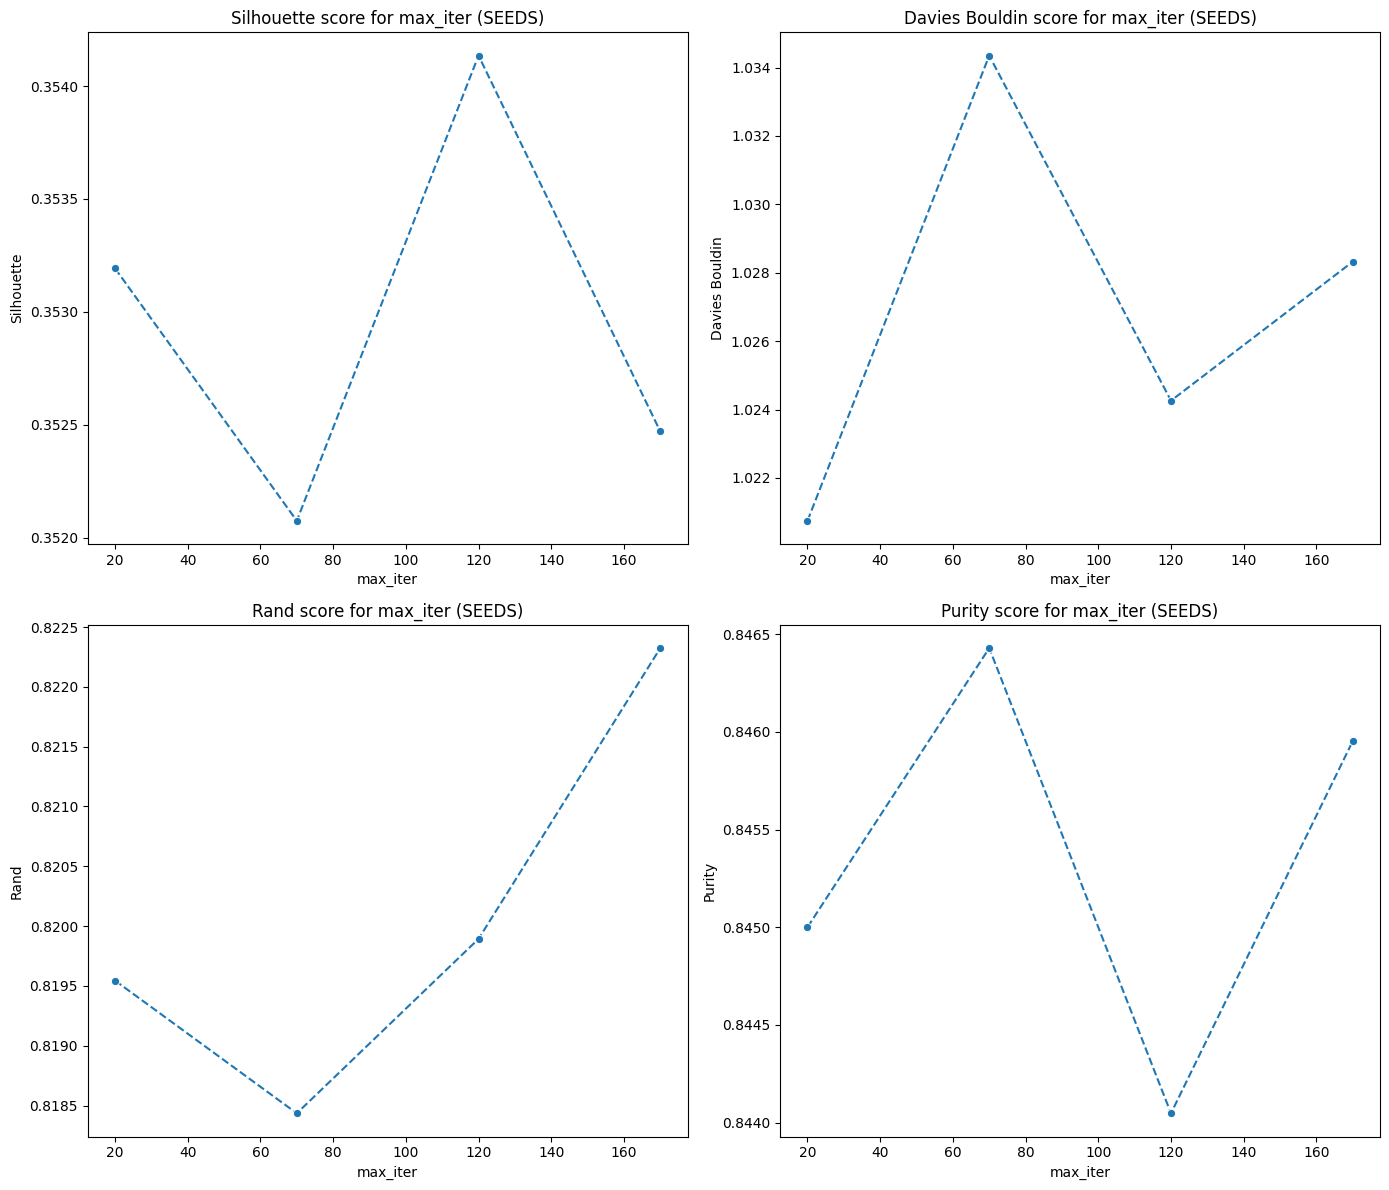

In [16]:
plot_results(results_seeds_kmeans, "max_iter", "max_iter (SEEDS)")

,Silhouette,Davies Bouldin,Rand,Purity,n_clusters,n_init,max_iter
28,0.400727,0.927871,0.899704,0.919048,3,15,20


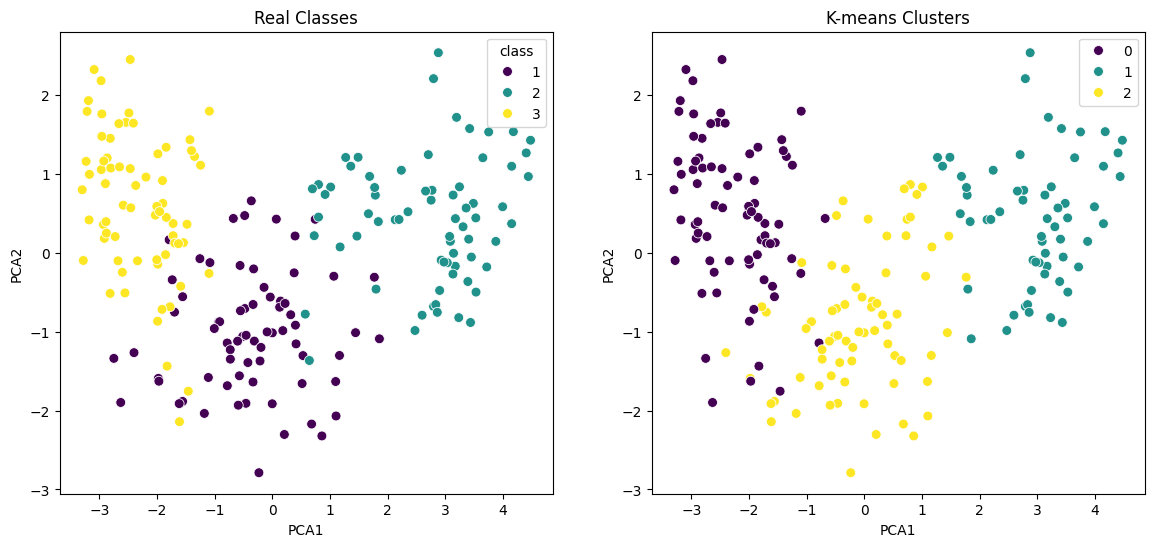

,Silhouette,Davies Bouldin
0,0.463513,0.757686


,Rand,Purity
0,0.874368,0.895238


In [17]:
best_res_seeds_kmeans = results_seeds_kmeans.sort_values("Rand", ascending=False).head(
    1
)

display(best_res_seeds_kmeans)


visualize_kmeans(
    X_seeds,
    y_seeds,
    n_clusters=best_res_seeds_kmeans["n_clusters"].values[0],
    n_init=best_res_seeds_kmeans["n_init"].values[0],
    max_iter=best_res_seeds_kmeans["max_iter"].values[0],
)

### GLASS

In [18]:
results_glass_kmeans = test_all_params(
    X_glass, y_glass, n_clusters_range, n_init_range, max_iter_range
)

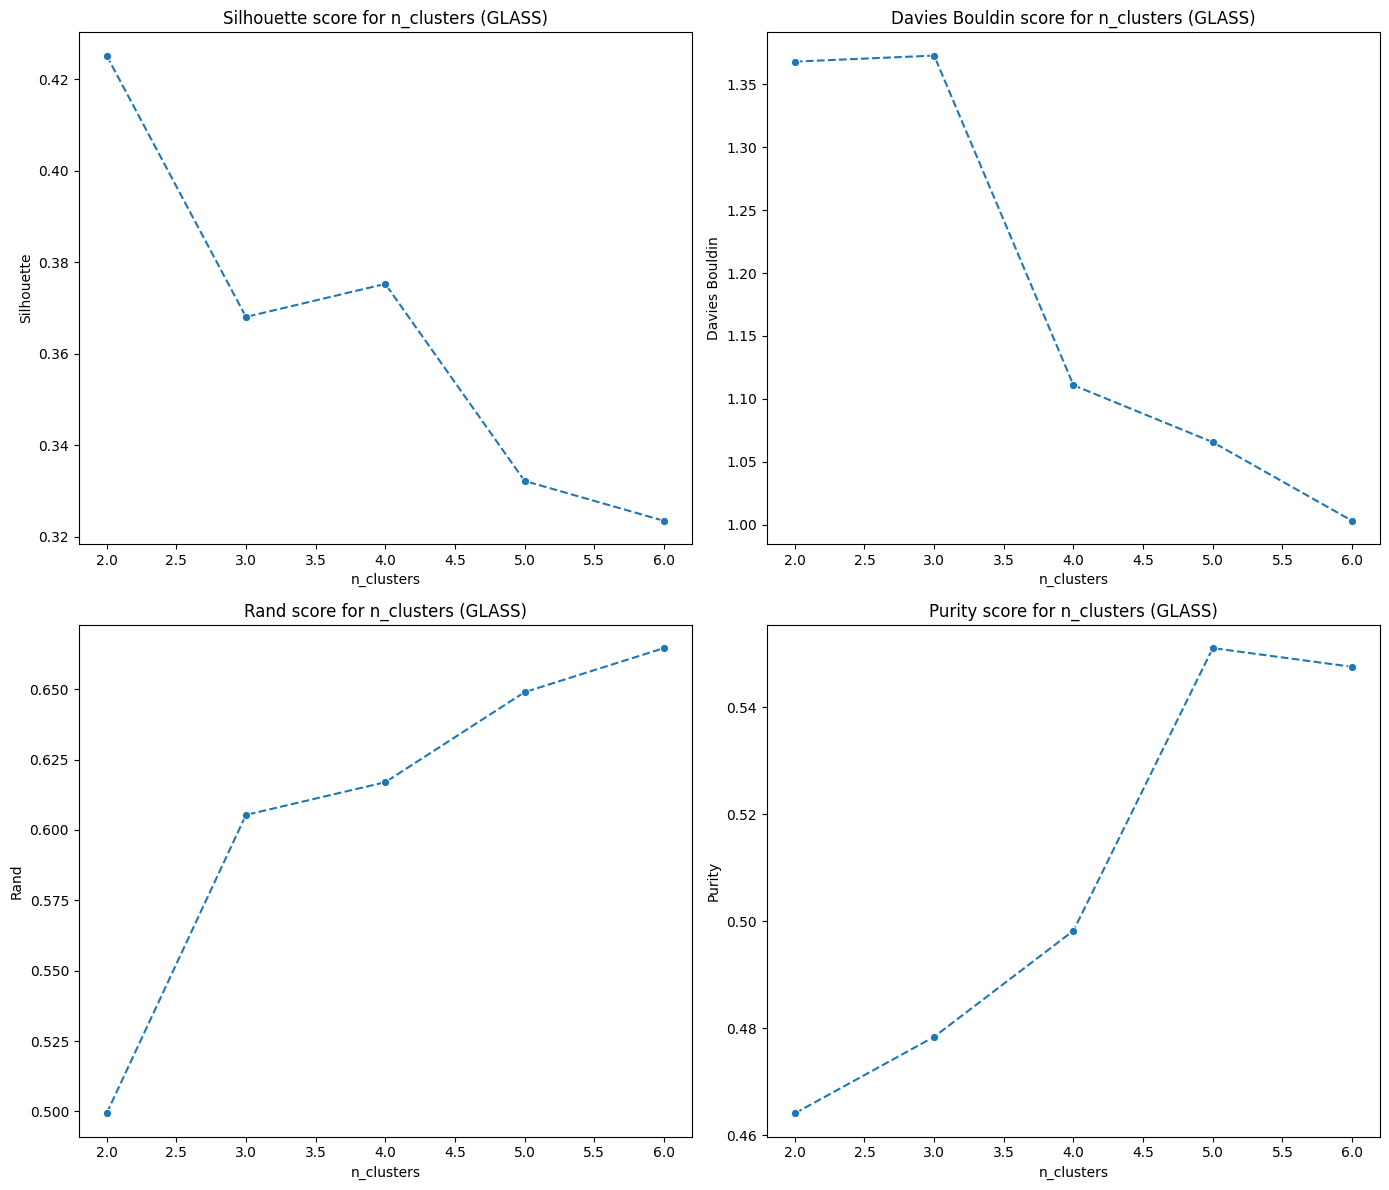

In [19]:
plot_results(results_glass_kmeans, "n_clusters", "n_clusters (GLASS)")

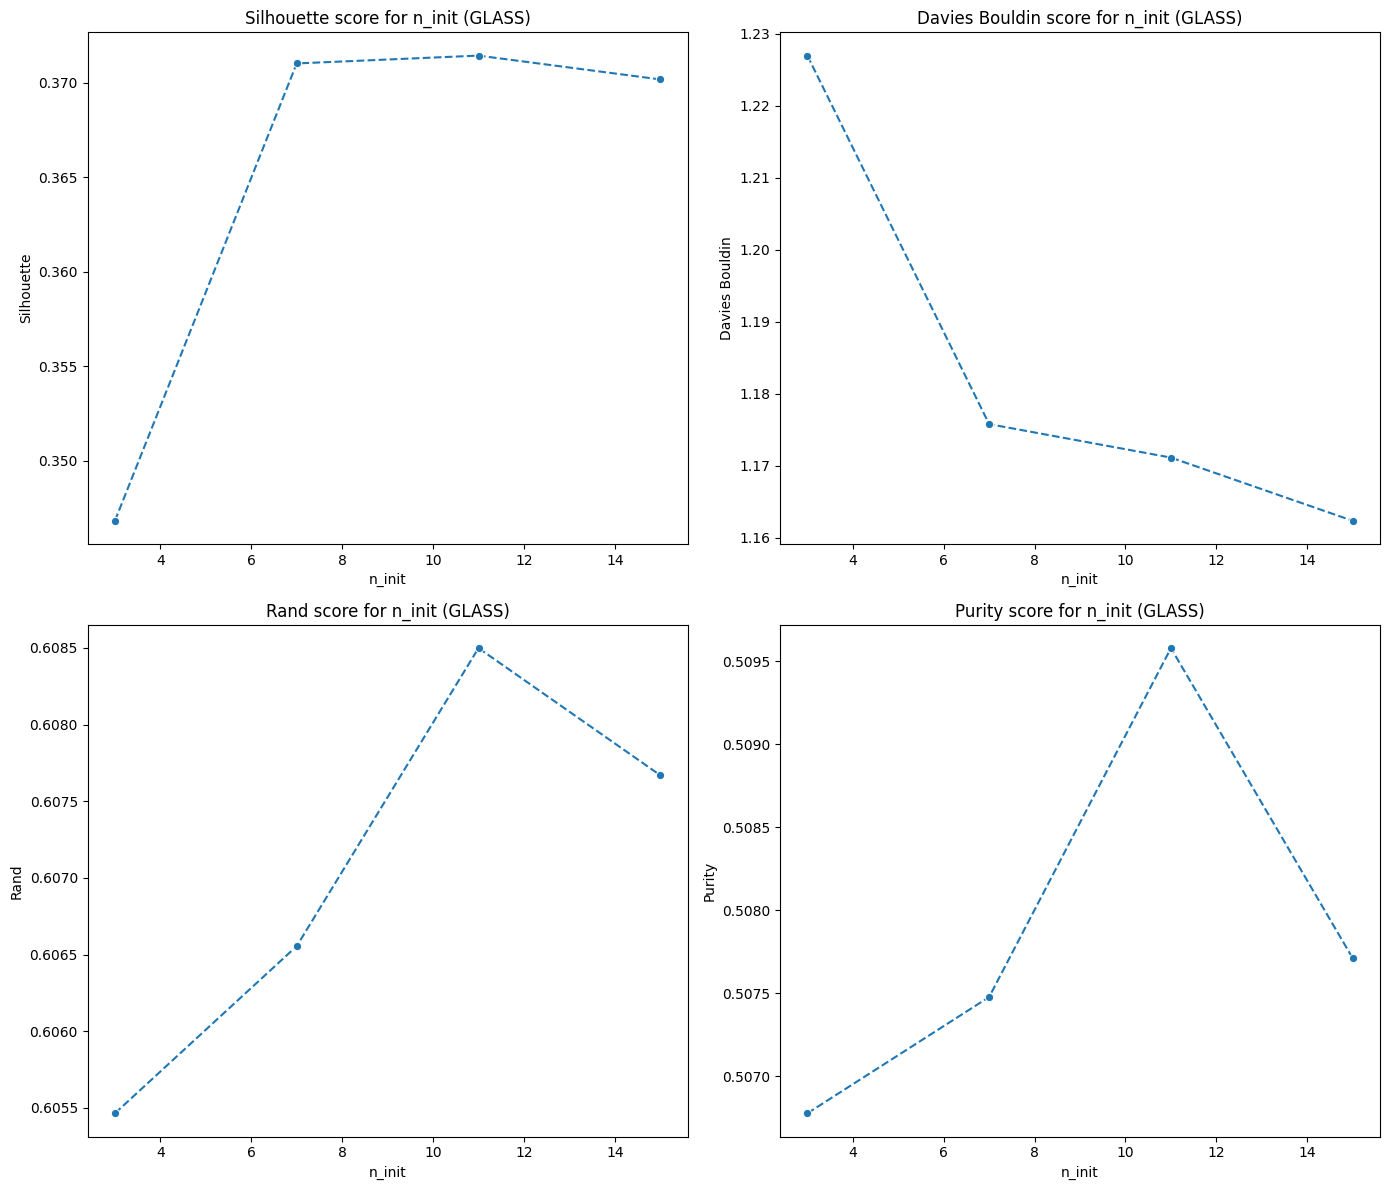

In [20]:
plot_results(results_glass_kmeans, "n_init", "n_init (GLASS)")

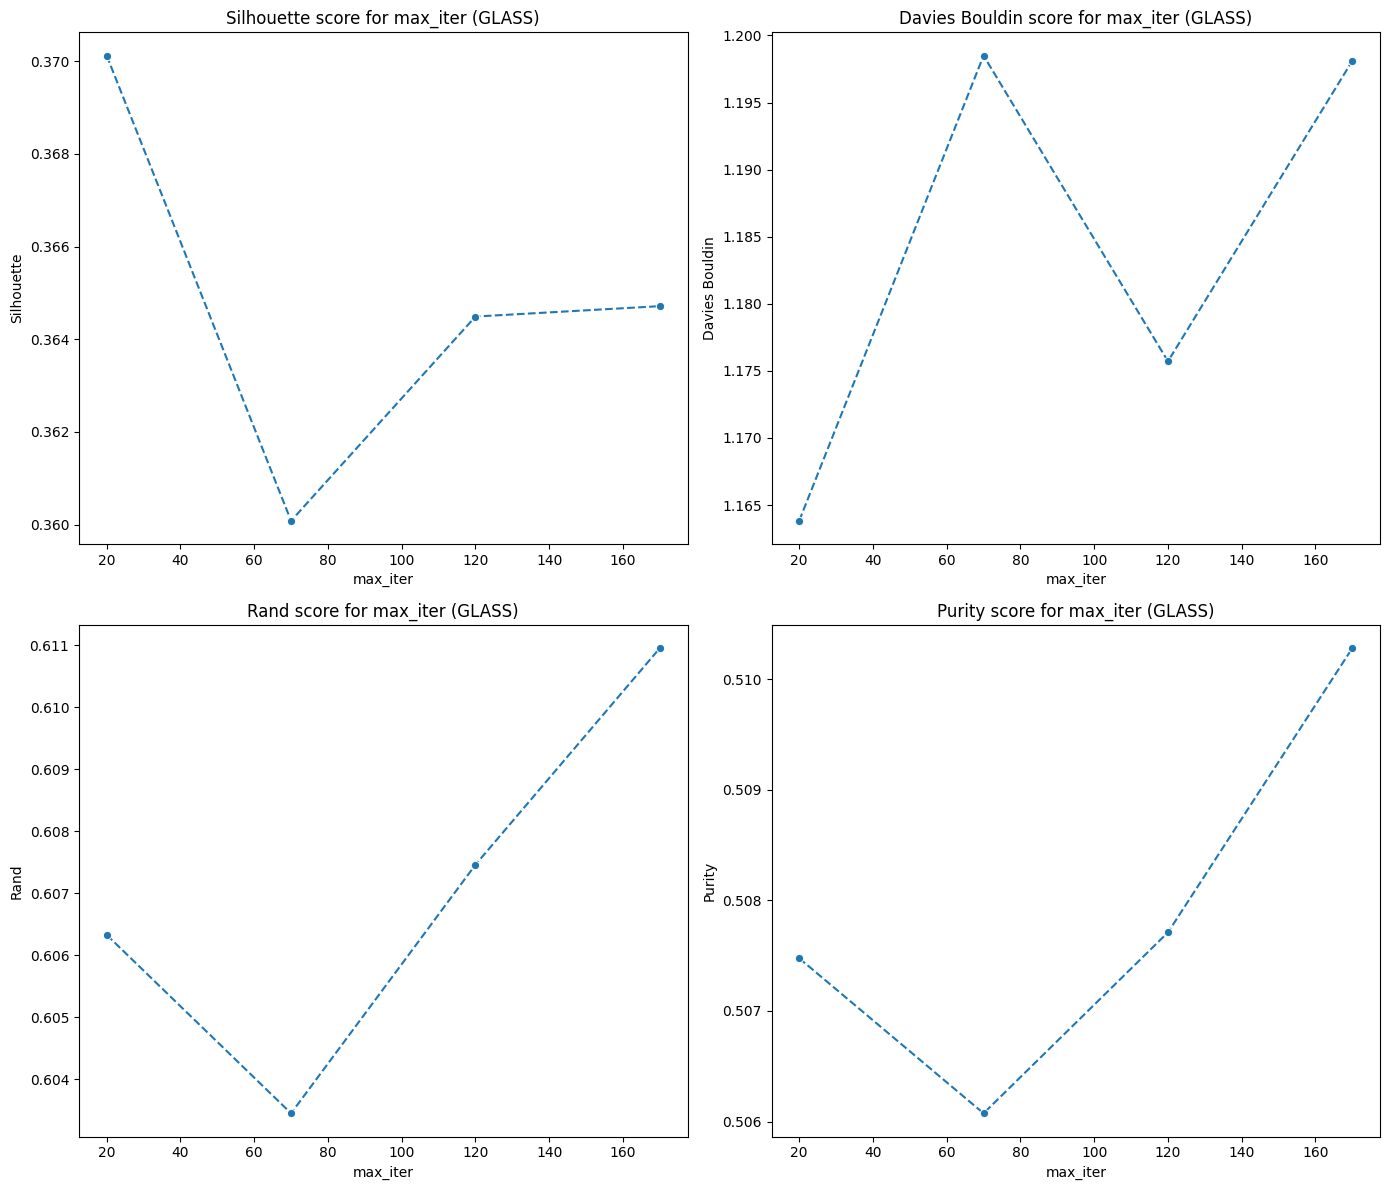

In [21]:
plot_results(results_glass_kmeans, "max_iter", "max_iter (GLASS)")

,Silhouette,Davies Bouldin,Rand,Purity,n_clusters,n_init,max_iter
75,0.323429,1.025067,0.677548,0.565421,6,11,170


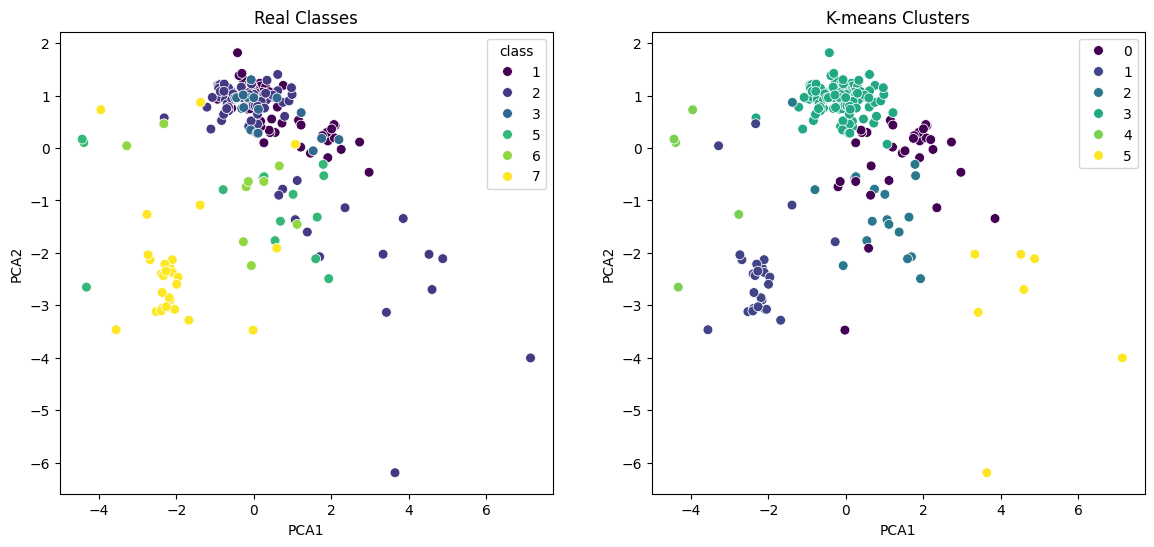

,Silhouette,Davies Bouldin
0,0.489392,1.134182


,Rand,Purity
0,0.676363,0.588785


In [22]:
best_res_glass_kmeans = results_glass_kmeans.sort_values("Rand", ascending=False).head(
    1
)

display(best_res_glass_kmeans)

visualize_kmeans(
    X_glass,
    y_glass,
    n_clusters=best_res_glass_kmeans["n_clusters"].values[0],
    n_init=best_res_glass_kmeans["n_init"].values[0],
    max_iter=best_res_glass_kmeans["max_iter"].values[0],
)

## 3. DBSCAN testing parameters on SEEDS and GLASS


In [30]:
def test_dbscan_params(
    X: pd.DataFrame,
    y: pd.DataFrame,
    eps: float,
    min_samples: int,
    metric: str,
):
    # standardize
    scale = StandardScaler()
    X_scaled = scale.fit_transform(X)

    y_dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit_predict(
        X_scaled
    )
    y_dbscan = pd.DataFrame(y_dbscan).squeeze()

    # print("params: ", eps, min_samples, metric)
    # print("unique clusters: ", len(set(y_dbscan)))

    if len(set(y_dbscan)) == 1:
        return pd.DataFrame(
            {
                "Silhouette": -1,
                "Davies Bouldin": -1,
                "Rand": -1,
                "Purity": -1,
            },
            index=[0],
        )

    quality_metrics_df = quality_metrics(X_scaled, y_dbscan)
    grouping_metrics_df = grouping_metrics(y, y_dbscan)

    return pd.concat([quality_metrics_df, grouping_metrics_df], axis=1).assign(
        eps=eps, min_samples=min_samples, metric=metric
    )


def test_all_dbscan_params(
    X: pd.DataFrame, y: pd.DataFrame, eps_range, min_samples_range, metric_list
):
    results = []
    for eps in eps_range:
        for min_samples in min_samples_range:
            for metric in metric_list:
                res = test_dbscan_params(X, y, eps, min_samples, metric)
                results.append(res)

    return pd.concat(results, ignore_index=True)


def plot_dbscan_results(results: pd.DataFrame, metric: str, title: str):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Plot Silhouette score
    sns.lineplot(
        data=results,
        x=metric,
        y="Silhouette",
        errorbar=None,
        ax=axes[0, 0],
        marker="o",
        linestyle="--",
    )
    axes[0, 0].set_title(f"Silhouette score for {title}")

    # Plot Davies Bouldin score
    sns.lineplot(
        data=results,
        x=metric,
        y="Davies Bouldin",
        errorbar=None,
        ax=axes[0, 1],
        marker="o",
        linestyle="--",
    )
    axes[0, 1].set_title(f"Davies Bouldin score for {title}")

    # Plot Rand score
    sns.lineplot(
        data=results,
        x=metric,
        y="Rand",
        errorbar=None,
        ax=axes[1, 0],
        marker="o",
        linestyle="--",
    )
    axes[1, 0].set_title(f"Rand score for {title}")

    # Plot Purity score
    sns.lineplot(
        data=results,
        x=metric,
        y="Purity",
        errorbar=None,
        ax=axes[1, 1],
        marker="o",
        linestyle="--",
    )
    axes[1, 1].set_title(f"Purity score for {title}")

    plt.tight_layout()
    plt.show()


eps_range = np.arange(0.2, 2, 0.2)
min_samples_range = range(2, 6)
metric_list = ["euclidean", "manhattan", "chebyshev"]

### SEEDS

params:  0.2 2 euclidean
unique clusters:  2
params:  0.2 2 manhattan
unique clusters:  1
params:  0.2 2 chebyshev
unique clusters:  14
params:  0.2 3 euclidean
unique clusters:  1
params:  0.2 3 manhattan
unique clusters:  1
params:  0.2 3 chebyshev
unique clusters:  1
params:  0.2 4 euclidean
unique clusters:  1
params:  0.2 4 manhattan
unique clusters:  1
params:  0.2 4 chebyshev
unique clusters:  1
params:  0.2 5 euclidean
unique clusters:  1
params:  0.2 5 manhattan
unique clusters:  1
params:  0.2 5 chebyshev
unique clusters:  1
params:  0.4 2 euclidean
unique clusters:  24
params:  0.4 2 manhattan
unique clusters:  4
params:  0.4 2 chebyshev
unique clusters:  25
params:  0.4 3 euclidean
unique clusters:  9
params:  0.4 3 manhattan
unique clusters:  1
params:  0.4 3 chebyshev
unique clusters:  12
params:  0.4 4 euclidean
unique clusters:  1
params:  0.4 4 manhattan
unique clusters:  1
params:  0.4 4 chebyshev
unique clusters:  10
params:  0.4 5 euclidean
unique clusters:  1
param

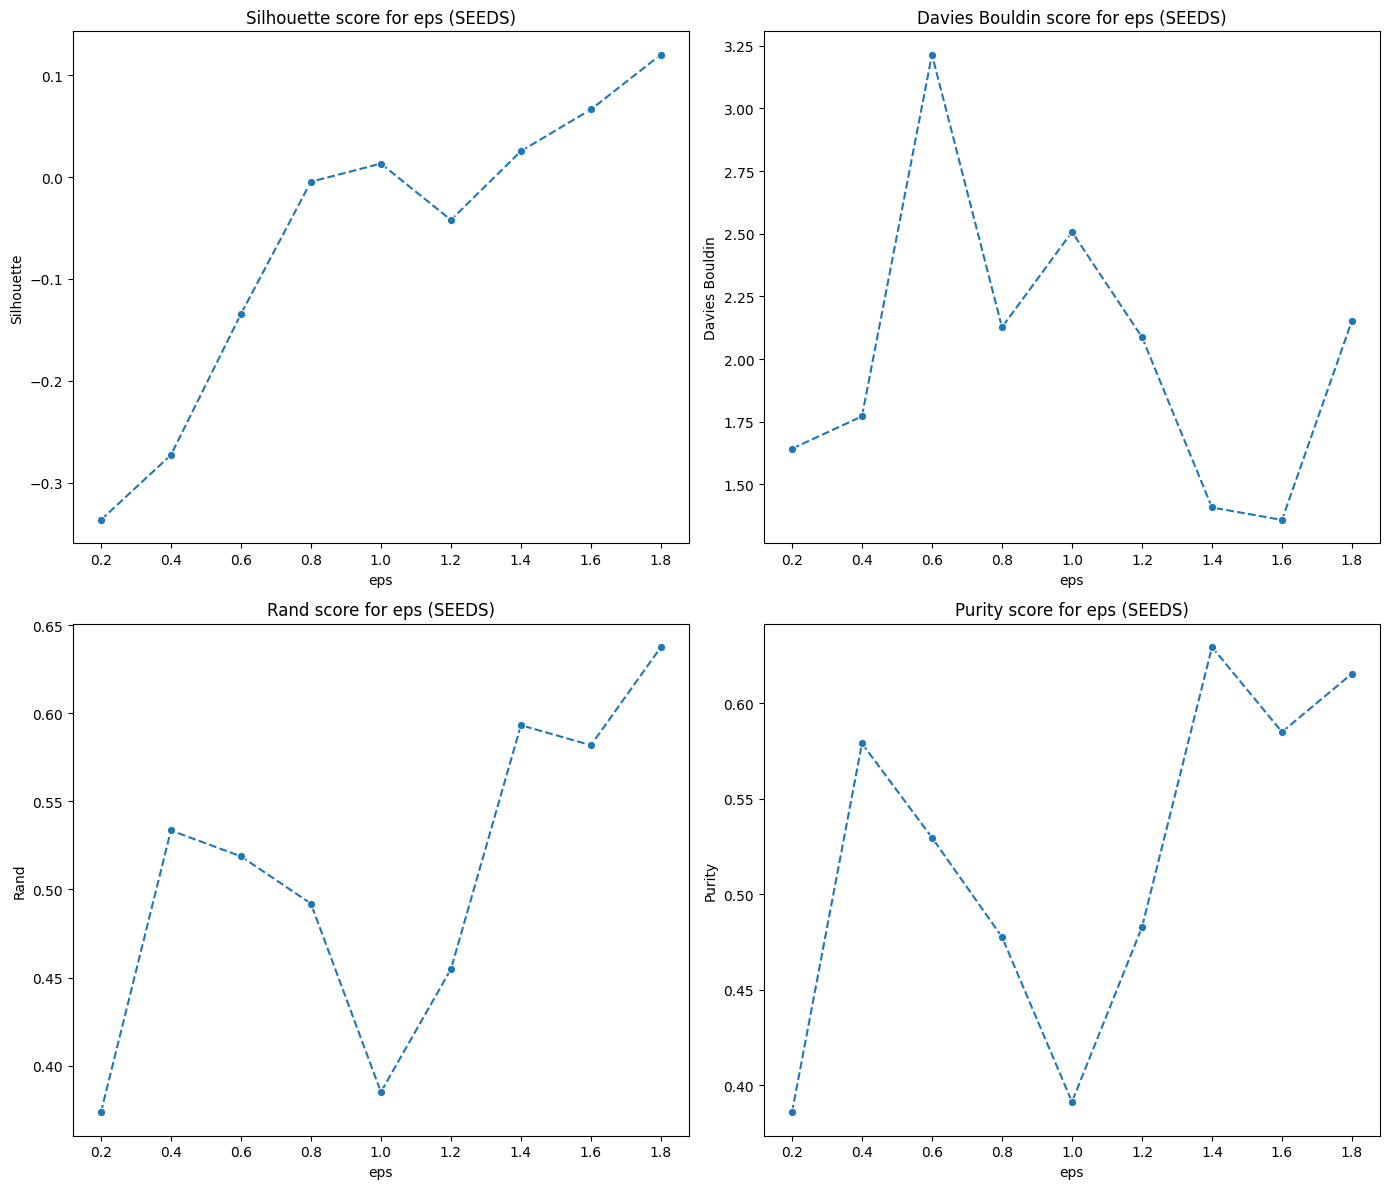

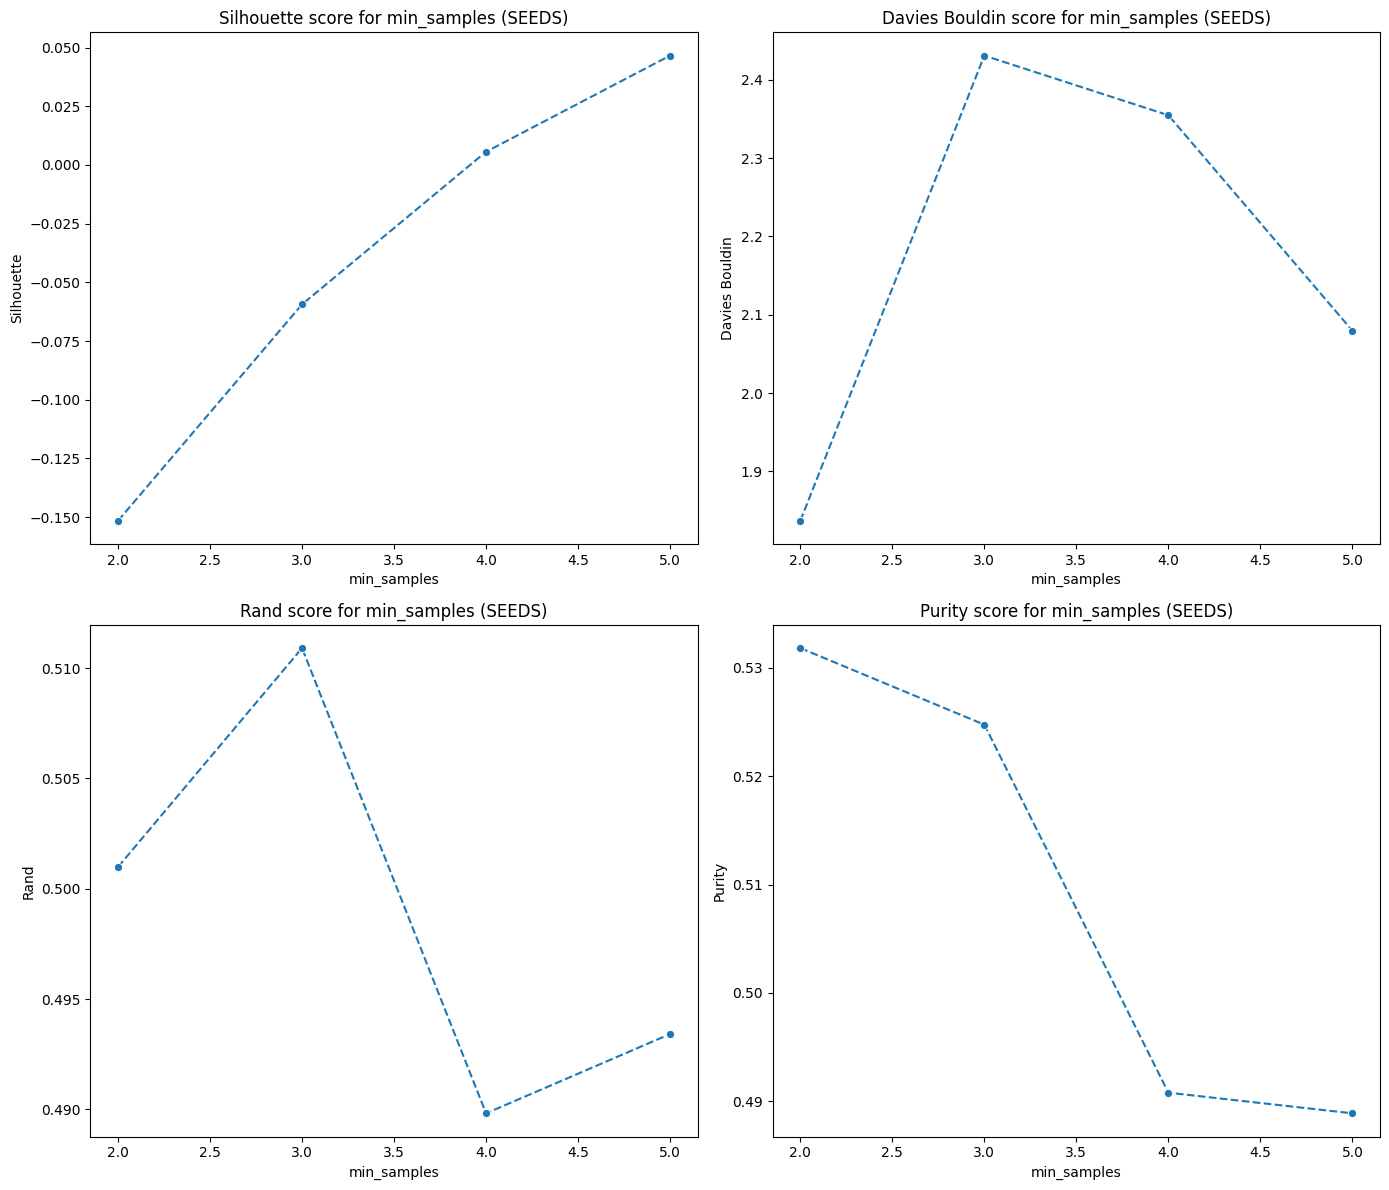

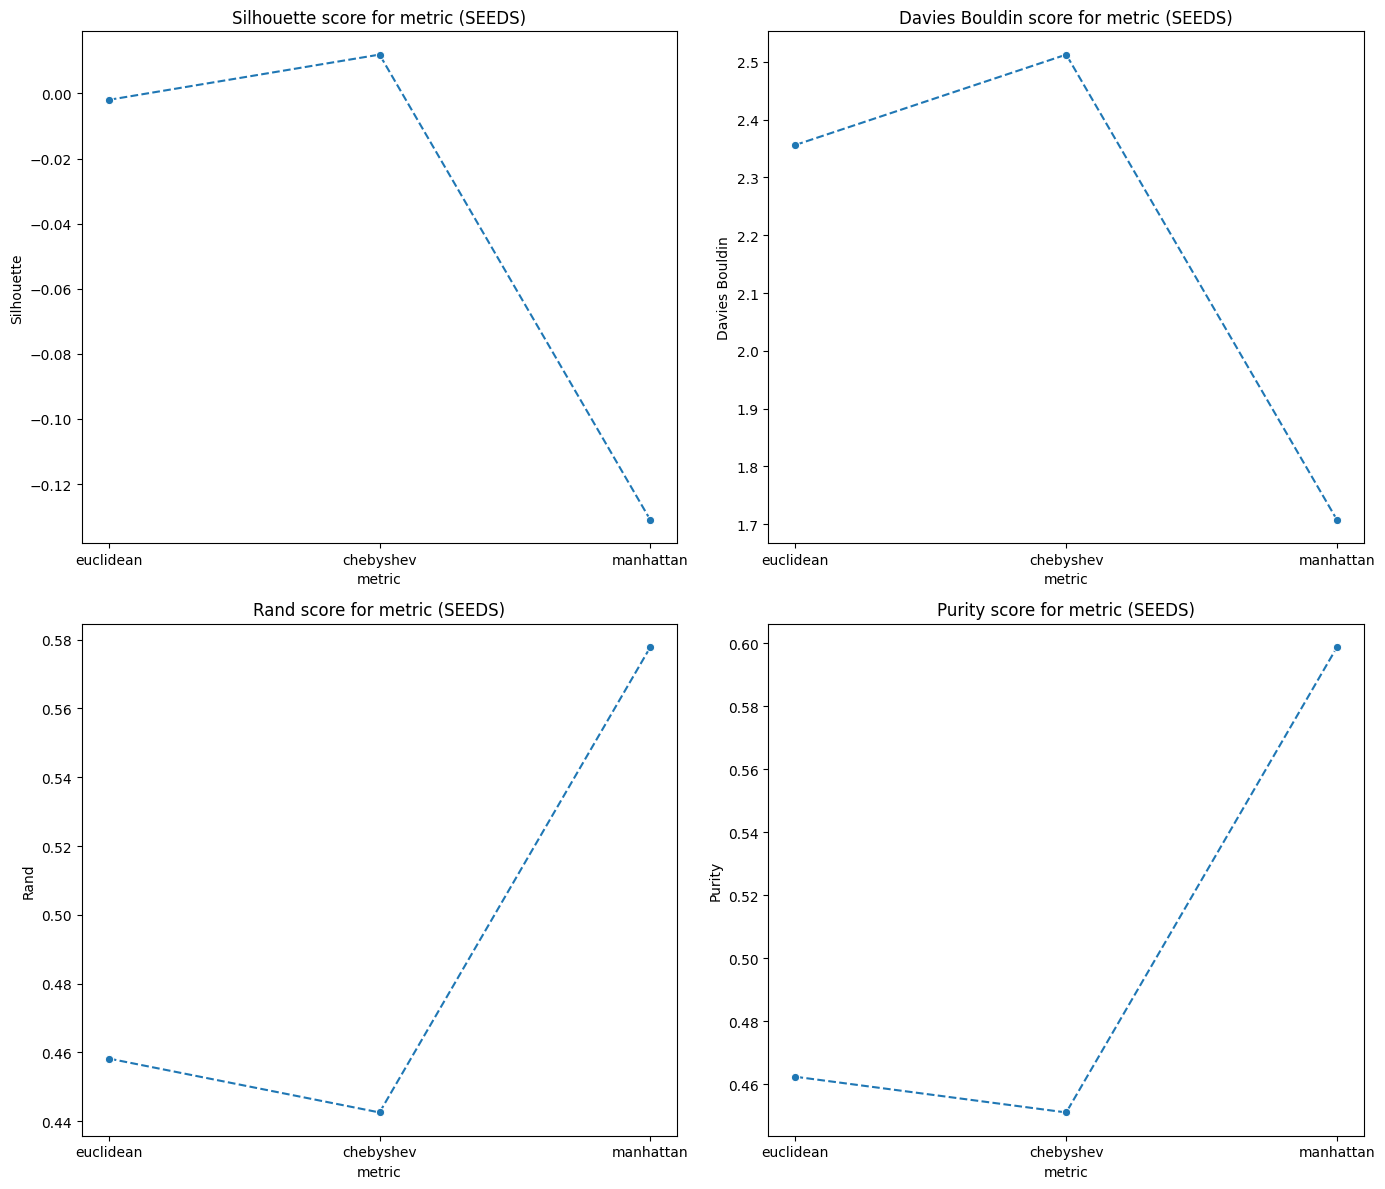

In [24]:
results_seeds_dbscan = test_all_dbscan_params(
    X_seeds, y_seeds, eps_range, min_samples_range, metric_list
)


plot_dbscan_results(results_seeds_dbscan, "eps", "eps (SEEDS)")
plot_dbscan_results(results_seeds_dbscan, "min_samples", "min_samples (SEEDS)")
plot_dbscan_results(results_seeds_dbscan, "metric", "metric (SEEDS)")

,Silhouette,Davies Bouldin,Rand,Purity,eps,min_samples,metric
73,-0.067981,1.523924,0.755525,0.852381,1.4,2.0,manhattan


[ 0 -1  0  0  1  0  0  0 -1 -1 -1  0 -1  0  0 -1 -1  1 -1  2  0  0  1  3
  0 -1  4  4  0  2 -1  0  0  0  0 -1 -1 -1  0 -1  5  5  6  7  0  0  0  0
  0  0  0 -1  0  0 -1  0  0 -1  0 -1 -1 -1 -1  2 -1  6  0  0  0  2  8  9
  9 10  9  9  9 -1 -1 -1 -1 10 11 10 10 10 -1 -1 12 12 10 10 10 10 -1  9
 10 -1 -1 10 -1 13 10 10 10 10 10  9 -1 10 10 10 10 -1 -1 10 10 10 10 10
 11  9  9 13 -1 10  8 13 10 -1 13 10 -1  9  7  0  9 14 14 -1 15 15 15  2
  2  2 -1  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2 16  3  2  2
  2  2  2  2  2  2  2 -1  2  2  2 -1  2  2  2  2 15  2  2  2 16 -1  2  2
  3  2  2  2  2  2  2  6  2  6  2 17  2  3  2 17  2  2]


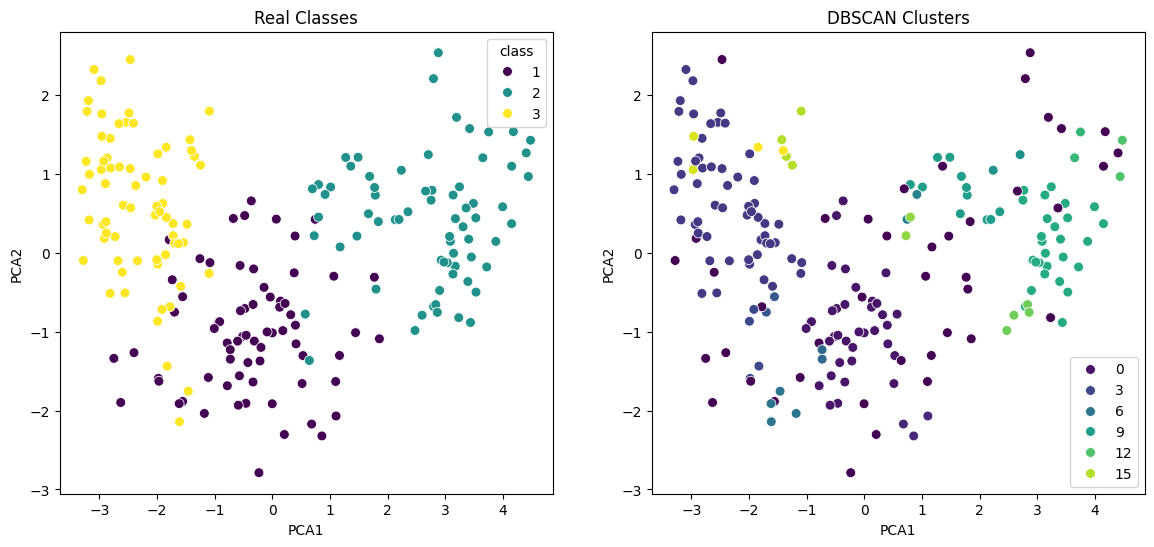

,Silhouette,Davies Bouldin
0,-0.2075,1.605281


,Rand,Purity
0,0.755525,0.852381


In [25]:
best_res_seeds_dbscan = results_seeds_dbscan.sort_values("Rand", ascending=False).head(
    1
)


display(best_res_seeds_dbscan)

visualize_dbscan(
    X_seeds,
    y_seeds,
    eps=float(best_res_seeds_dbscan["eps"].values[0]),
    min_samples=int(best_res_seeds_dbscan["min_samples"].values[0]),
    metric=best_res_seeds_dbscan["metric"].values[0],
)

### GLASS

params:  0.2 2 euclidean
unique clusters:  7
params:  0.2 2 manhattan
unique clusters:  4
params:  0.2 2 chebyshev
unique clusters:  14
params:  0.2 3 euclidean
unique clusters:  3
params:  0.2 3 manhattan
unique clusters:  1
params:  0.2 3 chebyshev
unique clusters:  7
params:  0.2 4 euclidean
unique clusters:  1
params:  0.2 4 manhattan
unique clusters:  1
params:  0.2 4 chebyshev
unique clusters:  4
params:  0.2 5 euclidean
unique clusters:  1
params:  0.2 5 manhattan
unique clusters:  1
params:  0.2 5 chebyshev
unique clusters:  2
params:  0.4 2 euclidean
unique clusters:  14
params:  0.4 2 manhattan
unique clusters:  9
params:  0.4 2 chebyshev
unique clusters:  22
params:  0.4 3 euclidean
unique clusters:  7
params:  0.4 3 manhattan
unique clusters:  2
params:  0.4 3 chebyshev
unique clusters:  10
params:  0.4 4 euclidean
unique clusters:  5
params:  0.4 4 manhattan
unique clusters:  1
params:  0.4 4 chebyshev
unique clusters:  6
params:  0.4 5 euclidean
unique clusters:  4
params

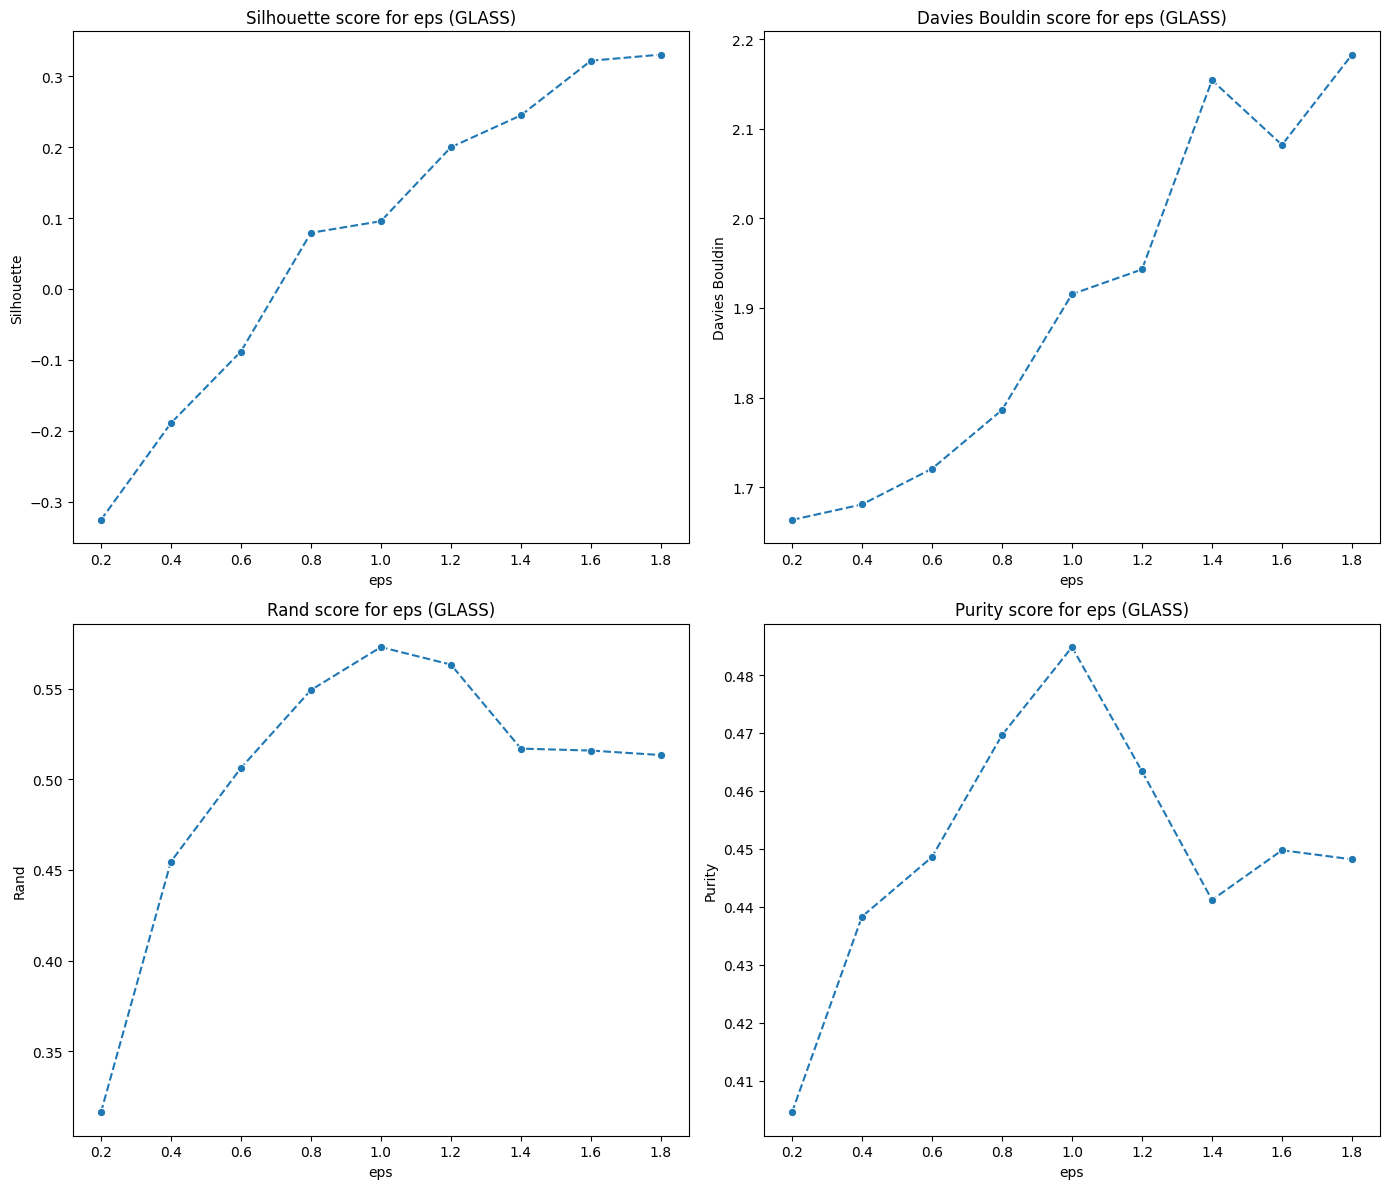

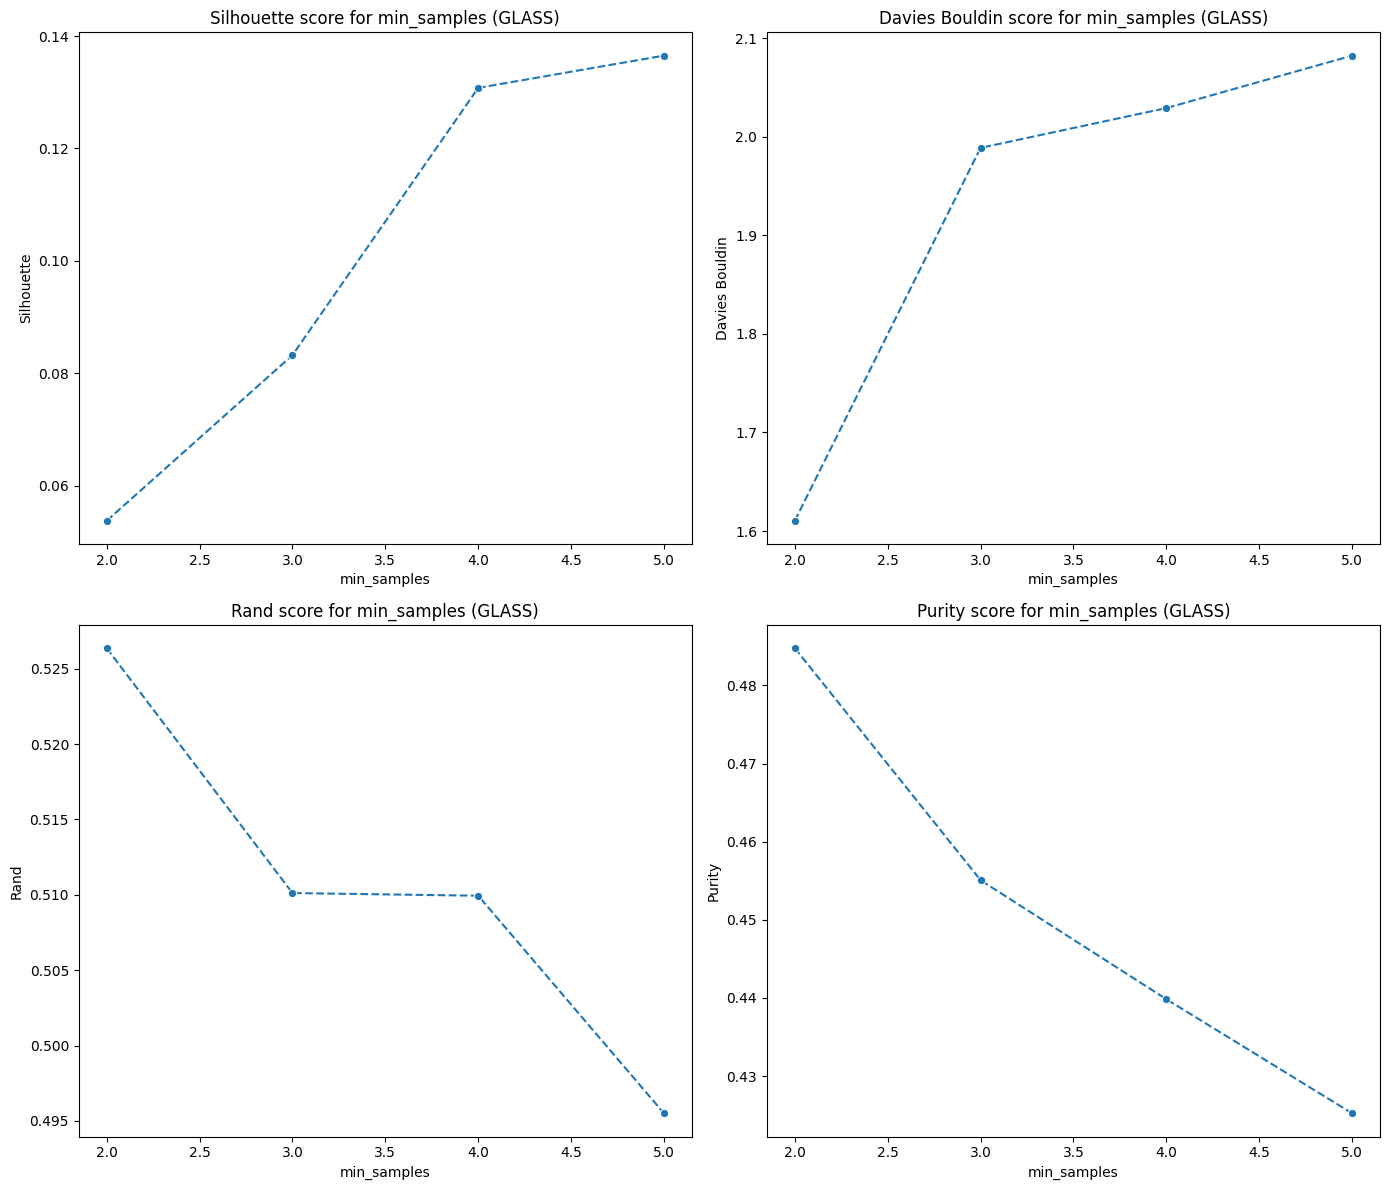

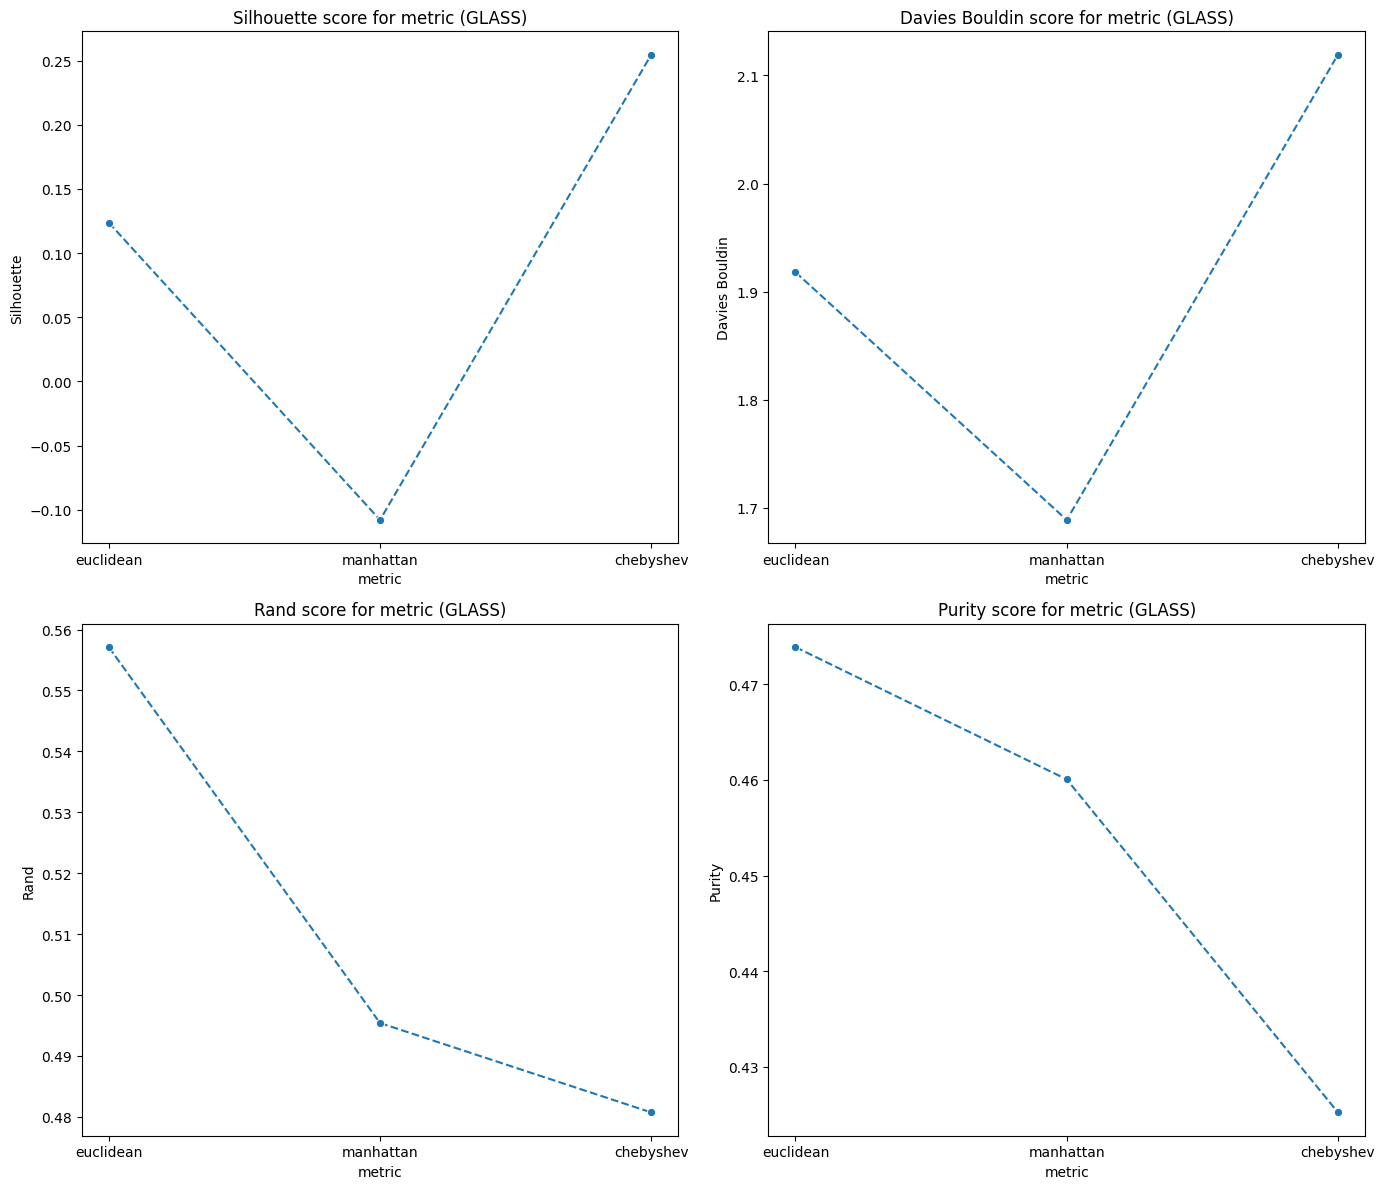

In [26]:
# GLASS
results_glass_dbscan = test_all_dbscan_params(
    X_glass, y_glass, eps_range, min_samples_range, metric_list
)

plot_dbscan_results(results_glass_dbscan, "eps", "eps (GLASS)")
plot_dbscan_results(results_glass_dbscan, "min_samples", "min_samples (GLASS)")
plot_dbscan_results(results_glass_dbscan, "metric", "metric (GLASS)")

,Silhouette,Davies Bouldin,Rand,Purity,eps,min_samples,metric
26,0.132186,1.670085,0.669914,0.528037,0.6,2.0,chebyshev


[-1  0  0  0  0  1  0  0  0  1  1  0  1  1  0  0  0  2 -1  1  1 -1  0  0
  0  0  0  0  0  0  1  0  1  1  0  0  0  0  2  2  0  0  0  2  1  0  1 -1
  2  0 -1  1  0  0  1  1 -1  0  0  1  0 -1  2  2  2 -1  2  2  2  2 -1  3
  0  0  0  0  0  0 -1  0  0  0  0  1 -1  0  0  1  0 -1 -1  0 -1  0  0  0
  1  1  0  0  1  0 -1 -1 -1 -1 -1 -1 -1 -1  4  4 -1  1  0  0  1  0  3  0
  0  1  0  0  5  1  0  6  6 -1 -1 -1  0 -1  0  3  1  0  0  0  0  1  1  0
  1  1  0  0  1  0  1  2 -1  0  0  0  0  2  0  1  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  7  7 -1 -1 -1  8 -1  8  8 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1
  9 10 10  9  9 11  9 11 11 -1 11 12 11 12 12 -1  9 -1 12 -1 13 13]


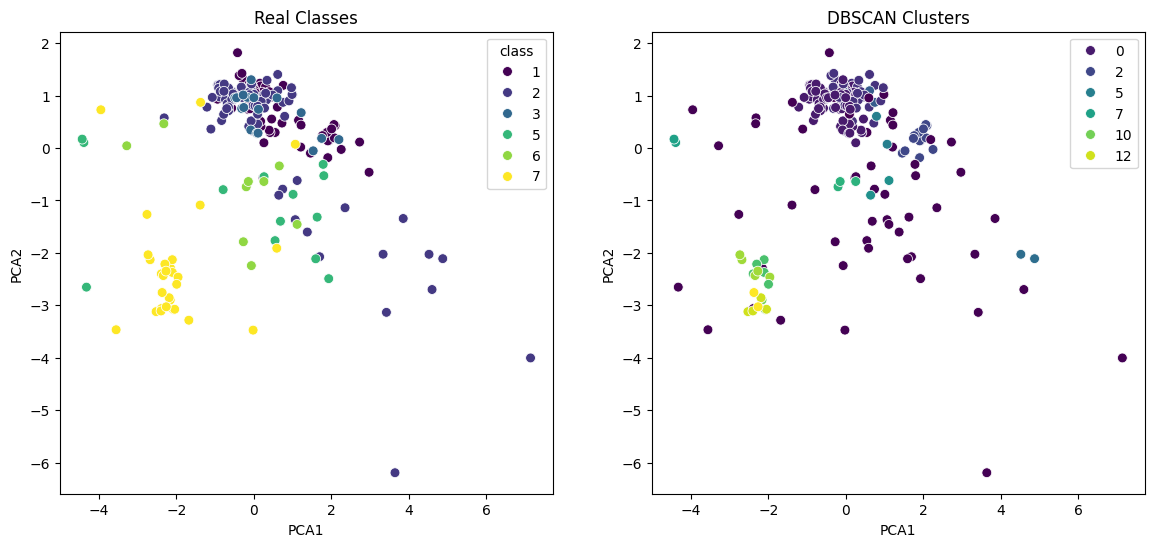

,Silhouette,Davies Bouldin
0,-0.107356,2.550406


,Rand,Purity
0,0.669914,0.528037


In [27]:
best_res_glass_dbscan = results_glass_dbscan.sort_values("Rand", ascending=False).head(
    1
)

display(best_res_glass_dbscan)

visualize_dbscan(
    X_glass,
    y_glass,
    eps=float(best_res_glass_dbscan["eps"].values[0]),
    min_samples=int(best_res_glass_dbscan["min_samples"].values[0]),
    metric=best_res_glass_dbscan["metric"].values[0],
)

## 4. k-means and DBSCAN comparison based on ground truth metrics and quality metrics


Silhouette         0.400727
Davies Bouldin     0.927871
Rand               0.899704
Purity             0.919048
n_clusters         3.000000
n_init            15.000000
max_iter          20.000000
Name: 28, dtype: float64

Silhouette        -0.067981
Davies Bouldin     1.523924
Rand               0.755525
Purity             0.852381
eps                     1.4
min_samples             2.0
metric            manhattan
Name: 73, dtype: object

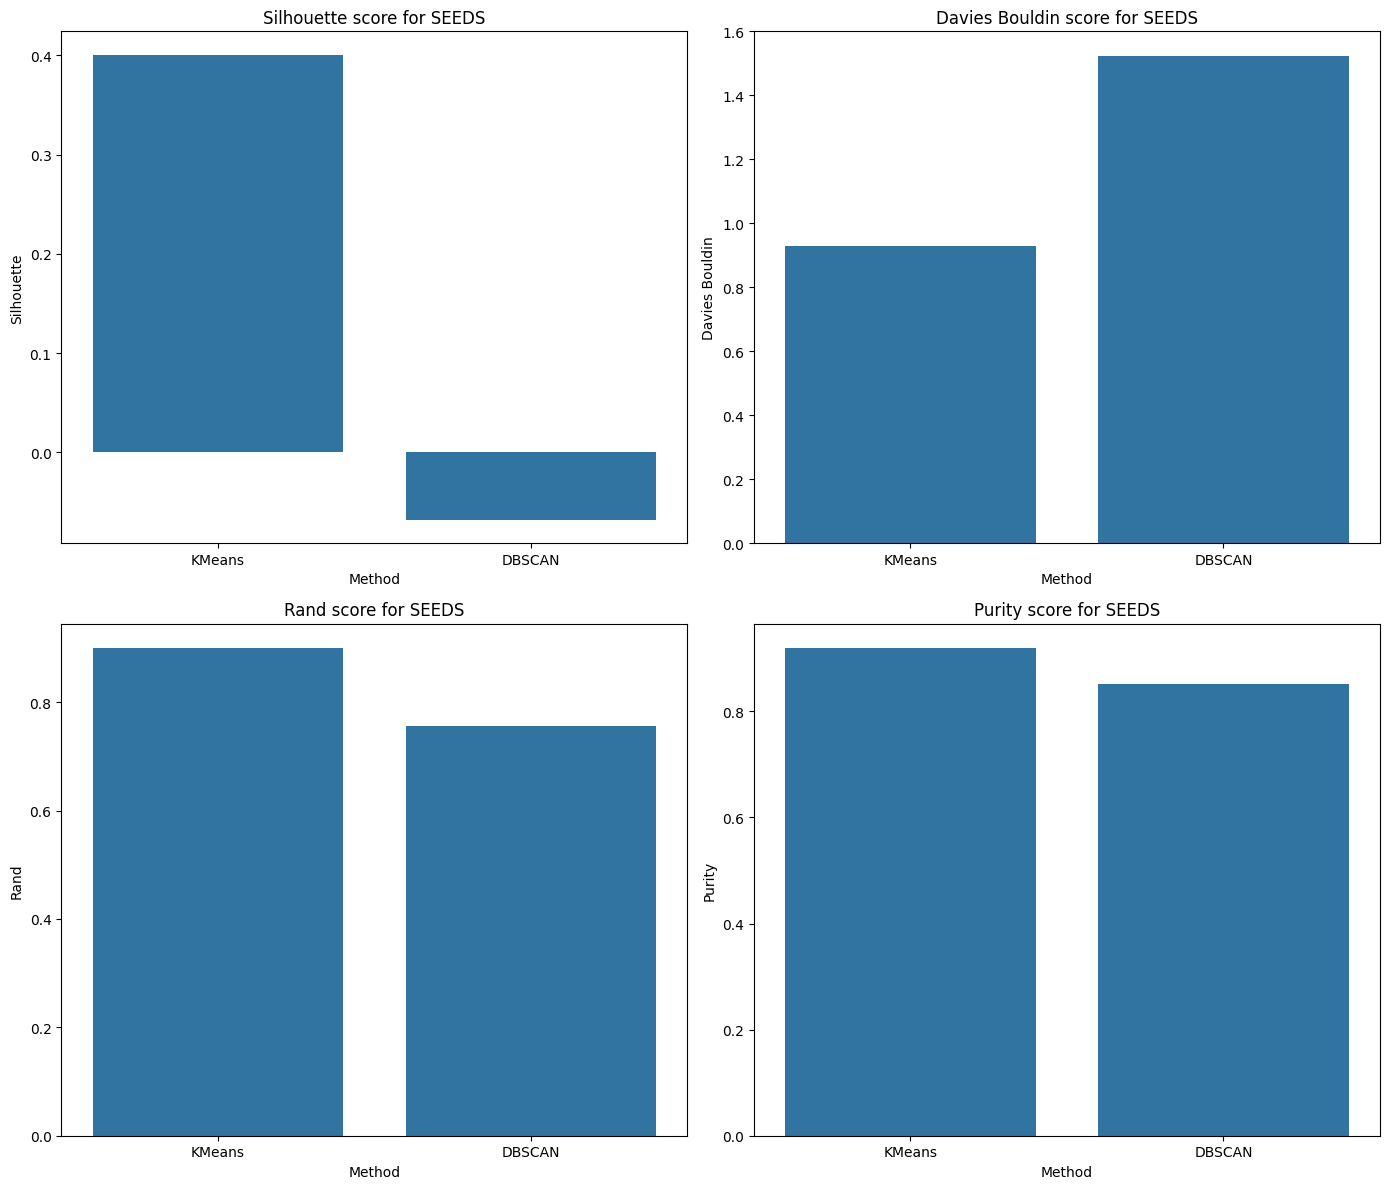

In [28]:
# compare seeds k-means and dbscan
best_params_seeds_kmeans = results_seeds_kmeans.sort_values(
    "Rand", ascending=False
).iloc[0]
best_params_seeds_dbscan = results_seeds_dbscan.sort_values(
    "Rand", ascending=False
).iloc[0]

kmeans = KMeans(
    n_clusters=int(best_params_seeds_kmeans["n_clusters"]),
    n_init=int(best_params_seeds_kmeans["n_init"]),
    max_iter=int(best_params_seeds_kmeans["max_iter"]),
)

dbscan = DBSCAN(
    eps=float(best_params_seeds_dbscan["eps"]),
    min_samples=int(best_params_seeds_dbscan["min_samples"]),
    metric=best_params_seeds_dbscan["metric"],
)

display(best_params_seeds_kmeans)
display(best_params_seeds_dbscan)

# wykres słupkowy porównujący wyniki dla k-means i dbscan using seaborn
best_params_seeds_kmeans = pd.DataFrame(best_params_seeds_kmeans).T
best_params_seeds_dbscan = pd.DataFrame(best_params_seeds_dbscan).T
best_params_seeds_kmeans["Method"] = "KMeans"
best_params_seeds_dbscan["Method"] = "DBSCAN"

results_seeds = pd.concat([best_params_seeds_kmeans, best_params_seeds_dbscan])

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot Silhouette score
sns.barplot(
    data=results_seeds,
    x="Method",
    y="Silhouette",
    ax=axes[0, 0],
)
axes[0, 0].set_title("Silhouette score for SEEDS")

# Plot Davies Bouldin score
sns.barplot(
    data=results_seeds,
    x="Method",
    y="Davies Bouldin",
    ax=axes[0, 1],
)
axes[0, 1].set_title("Davies Bouldin score for SEEDS")

# Plot Rand score
sns.barplot(
    data=results_seeds,
    x="Method",
    y="Rand",
    ax=axes[1, 0],
)
axes[1, 0].set_title("Rand score for SEEDS")

# Plot Purity score
sns.barplot(
    data=results_seeds,
    x="Method",
    y="Purity",
    ax=axes[1, 1],
)
axes[1, 1].set_title("Purity score for SEEDS")

plt.tight_layout()
plt.show()

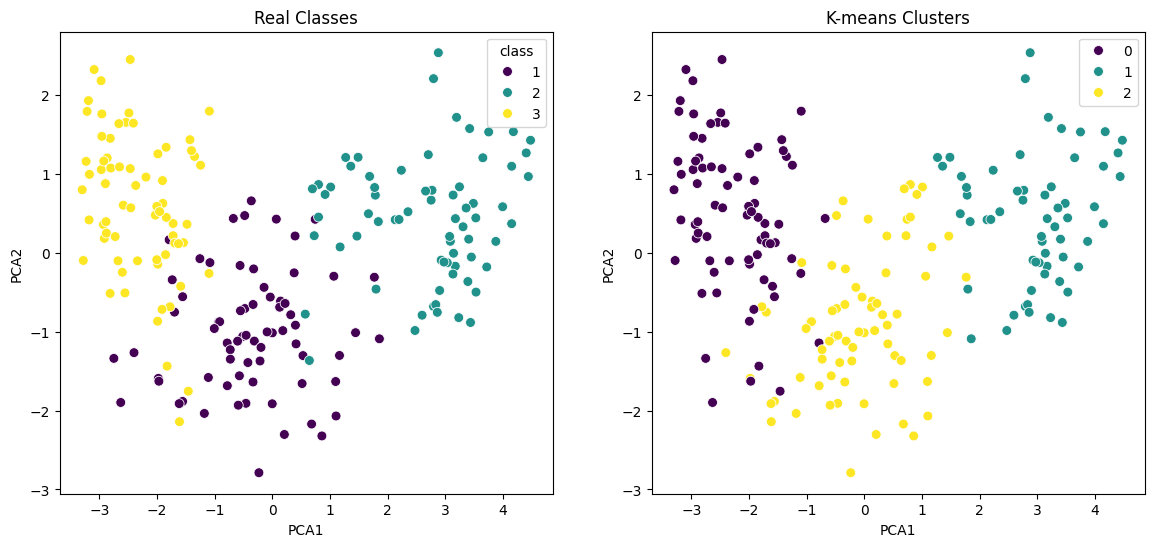

,Silhouette,Davies Bouldin
0,0.463513,0.757686


,Rand,Purity
0,0.874368,0.895238


[ 0 -1  0  0  1  0  0  0 -1 -1 -1  0 -1  0  0 -1 -1  1 -1  2  0  0  1  3
  0 -1  4  4  0  2 -1  0  0  0  0 -1 -1 -1  0 -1  5  5  6  7  0  0  0  0
  0  0  0 -1  0  0 -1  0  0 -1  0 -1 -1 -1 -1  2 -1  6  0  0  0  2  8  9
  9 10  9  9  9 -1 -1 -1 -1 10 11 10 10 10 -1 -1 12 12 10 10 10 10 -1  9
 10 -1 -1 10 -1 13 10 10 10 10 10  9 -1 10 10 10 10 -1 -1 10 10 10 10 10
 11  9  9 13 -1 10  8 13 10 -1 13 10 -1  9  7  0  9 14 14 -1 15 15 15  2
  2  2 -1  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2 16  3  2  2
  2  2  2  2  2  2  2 -1  2  2  2 -1  2  2  2  2 15  2  2  2 16 -1  2  2
  3  2  2  2  2  2  2  6  2  6  2 17  2  3  2 17  2  2]


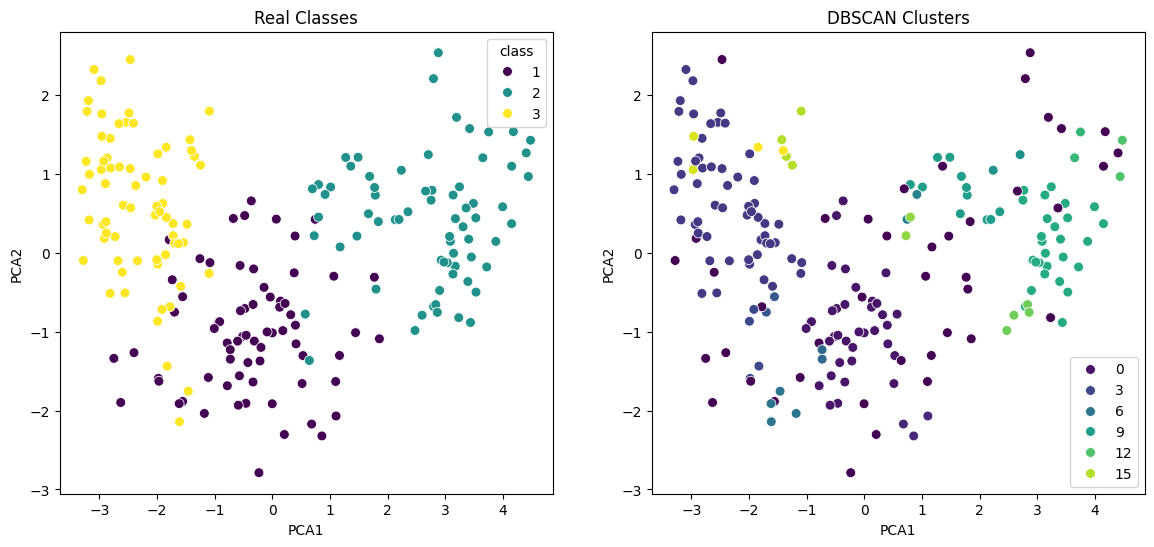

,Silhouette,Davies Bouldin
0,-0.2075,1.605281


,Rand,Purity
0,0.755525,0.852381


In [29]:
# visualize k-means
visualize_kmeans(
    X_seeds,
    y_seeds,
    n_clusters=int(best_res_seeds_kmeans["n_clusters"].values[0]),
    n_init=int(best_res_seeds_kmeans["n_init"].values[0]),
    max_iter=int(best_res_seeds_kmeans["max_iter"].values[0]),
)

# visualize dbscan
visualize_dbscan(
    X_seeds,
    y_seeds,
    eps=float(best_res_seeds_dbscan["eps"].values[0]),
    min_samples=int(best_res_seeds_dbscan["min_samples"].values[0]),
    metric=best_res_seeds_dbscan["metric"].values[0],
)

## 5. Clustering tests on PCB dataset


In [45]:
def remove_outliers(
    X: pd.DataFrame, y: pd.DataFrame
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Remove outliers from the dataset using Z-score method
    """
    z_scores = np.abs(stats.zscore(X))
    threshold = 3
    outliers = (z_scores > threshold).any(axis=1)
    X_no_outliers = X[~outliers]
    y_no_outliers = y.loc[X_no_outliers.index]
    return X_no_outliers, y_no_outliers

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375


,class
0,0
1,0
2,0
3,0
4,0


Drop column Attr37


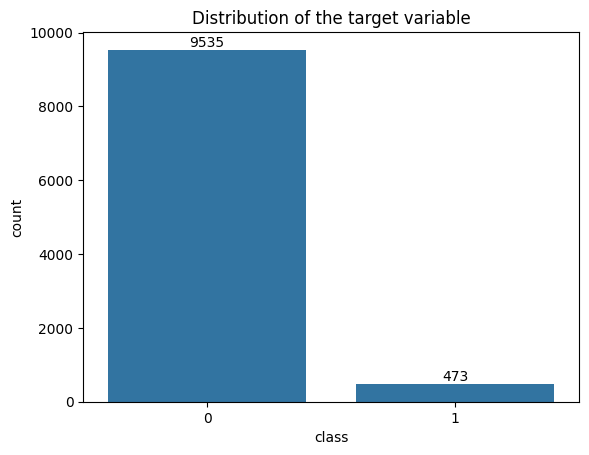

1 - Bankrupt, 0 - Not bankrupt


In [53]:
from sklearn.impute import SimpleImputer


file_name = "./dataset/3year.arff"
data = arff.loadarff(file_name)

X_pcb = pd.DataFrame(data[0])
y_pcb = pd.DataFrame(X_pcb.pop("class"))

y_pcb = pd.DataFrame(y_pcb["class"].apply(lambda x: 1 if x == b"1" else 0))
display(X_pcb.head())
display(y_pcb.head())

# drop column A37 (based on previous analysis)
print("Drop column Attr37")
X_pcb = X_pcb.drop(columns=["Attr37"])

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_pcb_imputed = imputer.fit_transform(X_pcb)
X_pcb_imputed = pd.DataFrame(X_pcb_imputed, columns=X_pcb.columns)
X_pcb = X_pcb_imputed

# remove outliers
X_pcb, y_pcb = remove_outliers(X_pcb, y_pcb)

# standardize
scaler = StandardScaler()
X_pcb_scaled_arr = scaler.fit_transform(X_pcb)
X_pcb = pd.DataFrame(X_pcb_scaled_arr, columns=X_pcb.columns)


# Distribution of the target variable
ax = sns.countplot(x=y_pcb.columns[0], data=y_pcb)
plt.title("Distribution of the target variable")
abs_values = y_pcb["class"].value_counts().values
ax.bar_label(ax.containers[0], labels=abs_values, label_type="edge")
plt.show()
print("1 - Bankrupt, 0 - Not bankrupt")

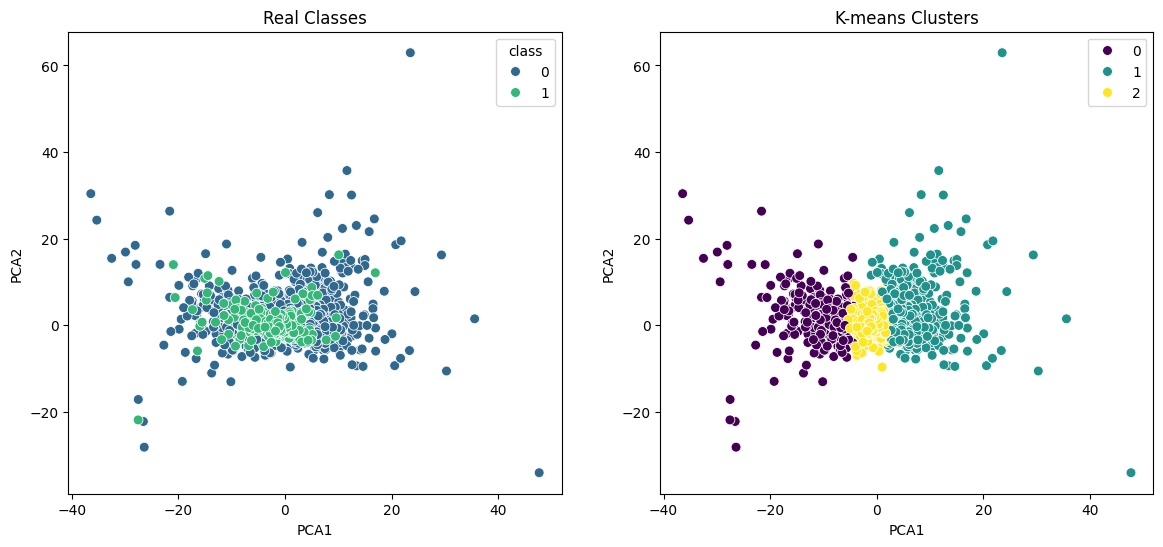

,Silhouette,Davies Bouldin
0,0.518135,0.928184


,Rand,Purity
0,0.644497,0.952738


In [55]:
n_init_range = range(3, 16, 4)
max_iter_range = range(20, 200, 50)
n_clusters_range = range(2, 4)


results_pcb_kmeans = test_all_params(
    X_pcb, y_pcb, n_clusters_range, n_init_range, max_iter_range
)

best_params_pcb = results_pcb_kmeans.sort_values("Rand", ascending=False).head(1)

visualize_kmeans(
    X_pcb,
    y_pcb,
    n_clusters=int(best_params_pcb["n_clusters"].values[0]),
    n_init=int(best_params_pcb["n_init"].values[0]),
    max_iter=int(best_params_pcb["max_iter"].values[0]),
)

In [56]:
display(results_pcb_kmeans)

,Silhouette,Davies Bouldin,Rand,Purity,n_clusters,n_init,max_iter
0,0.213505,2.056922,0.561739,0.952738,2,3,20
1,0.233481,2.030348,0.582163,0.952738,2,3,70
2,0.207640,2.059211,0.557122,0.952738,2,3,120
3,0.233481,2.030348,0.582163,0.952738,2,3,170
4,0.237559,2.025653,0.586182,0.952738,2,7,20
5,0.233171,2.030471,0.581921,0.952738,2,7,70
6,0.207690,2.063060,0.556045,0.952738,2,7,120
7,0.208350,2.065007,0.555978,0.952738,2,7,170
8,0.207310,2.063735,0.555578,0.952738,2,11,20
9,0.233171,2.030471,0.581921,0.952738,2,11,70
